# Importing Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb

!pip install xgboost
!pip install lightgbm


In [ ]:
train = pd.read_csv("/content/TrainDJEZZY.csv")
test = pd.read_csv("/content/TestDJEZZY.csv")
offers = pd.read_csv("/content/Dset_offers.csv")

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import lightgbm as lgb
train = pd.read_csv("/content/TrainDJEZZY.csv")
test = pd.read_csv("/content/TestDJEZZY.csv")
for df in [train, test]:
    df = df.drop_duplicates()
    df['USAGE_DATE'] = pd.to_datetime(df['USAGE_DATE'])
    df['SUBSCRIPTION_DATE'] = pd.to_datetime(df['SUBSCRIPTION_DATE'])
    df['USAGE_DAY'] = df['USAGE_DATE'].dt.day
    df['USAGE_MONTH'] = df['USAGE_DATE'].dt.month
    df['USAGE_YEAR'] = df['USAGE_DATE'].dt.year
    df['USAGE_WEEKDAY'] = df['USAGE_DATE'].dt.weekday
    df['SUBSCRIPTION_DAY'] = df['SUBSCRIPTION_DATE'].dt.day
    df['SUBSCRIPTION_MONTH'] = df['SUBSCRIPTION_DATE'].dt.month
    df['SUBSCRIPTION_YEAR'] = df['SUBSCRIPTION_DATE'].dt.year
    df['SUBSCRIPTION_WEEKDAY'] = df['SUBSCRIPTION_DATE'].dt.weekday
    df['usage_Type'] = df['usage_Type'].astype('category')
    df['Destination'] = df['Destination'].astype('category')
train = pd.get_dummies(train)
test = pd.get_dummies(test)
test = test.reindex(columns=train.columns, fill_value=0)
test.drop(['Product_ID'], axis=1, inplace=True)
scaler = StandardScaler()
numerical_cols = ['Amount_DZD', 'Amount_data_DZD', 'Volume_Data_KB', 'Volume_KB_SC_Nbr', 'Nb_USAGE']
train[numerical_cols] = scaler.fit_transform(train[numerical_cols])
test[numerical_cols] = scaler.transform(test[numerical_cols])
X = train.drop('Product_ID', axis=1)
y = train['Product_ID']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
model = lgb.LGBMClassifier(objective='multiclass', num_classes=len(train['Product_ID'].unique()), random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))
test = test.drop_duplicates(subset='subscribers', keep='first')
predictions = model.predict(test)
submission = pd.DataFrame({
    'subscribers': test['subscribers'],
    'Product_ID': predictions
})
submission.to_csv('final_submission.csv', index=False)
print("Submission file created successfully!")

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
train = pd.read_csv("/content/TrainDJEZZY.csv")
test = pd.read_csv("/content/TestDJEZZY.csv")
for df in [train, test]:
    df = df.drop_duplicates()
    df['USAGE_DATE'] = pd.to_datetime(df['USAGE_DATE'])
    df['SUBSCRIPTION_DATE'] = pd.to_datetime(df['SUBSCRIPTION_DATE'])
    df['USAGE_DAY'] = df['USAGE_DATE'].dt.day
    df['USAGE_MONTH'] = df['USAGE_DATE'].dt.month
    df['USAGE_YEAR'] = df['USAGE_DATE'].dt.year
    df['USAGE_WEEKDAY'] = df['USAGE_DATE'].dt.weekday
    df['SUBSCRIPTION_DAY'] = df['SUBSCRIPTION_DATE'].dt.day
    df['SUBSCRIPTION_MONTH'] = df['SUBSCRIPTION_DATE'].dt.month
    df['SUBSCRIPTION_YEAR'] = df['SUBSCRIPTION_DATE'].dt.year
    df['SUBSCRIPTION_WEEKDAY'] = df['SUBSCRIPTION_DATE'].dt.weekday
train.drop(['USAGE_DATE', 'SUBSCRIPTION_DATE'], axis=1, inplace=True)
test.drop(['USAGE_DATE', 'SUBSCRIPTION_DATE'], axis=1, inplace=True)
train = pd.get_dummies(train)
test = pd.get_dummies(test)
test = test.reindex(columns=train.columns, fill_value=0)
test.drop(['Product_ID'], axis=1, inplace=True)
scaler = StandardScaler()
numerical_cols = ['Amount_DZD', 'Amount_data_DZD', 'Volume_Data_KB', 'Volume_KB_SC_Nbr', 'Nb_USAGE']
train[numerical_cols] = scaler.fit_transform(train[numerical_cols])
test[numerical_cols] = scaler.transform(test[numerical_cols])
X = train.drop(['Product_ID'], axis=1)
y = train['Product_ID']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))
test = test.drop_duplicates(subset='subscribers', keep='first')
predictions = model.predict(test)
submission = pd.DataFrame({
    'subscribers': test['subscribers'],
    'Product_ID': predictions})
submission.to_csv('final_submission.csv', index=False)
print("Submission file created successfully!")

Validation Accuracy: 0.6695252679938745
Submission file created successfully!


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
train = pd.read_csv("/content/TrainDJEZZY.csv")
test = pd.read_csv("/content/TestDJEZZY.csv")
offers = pd.read_csv("/content/Dset_offers.csv")
offers.drop(['Measure_Onnet_Bonus', 'Unlimited_Voice_Offnet', 'Onnet_Bonus', 'Measure_Offnet_Bonus'], axis=1, inplace=True)
offers['Unlimited_Voice_Onnet'] = offers['Unlimited_Voice_Onnet'].map({'Yes': 1, 'No': 0})
offers.loc[offers['Data_Measure'] == 'Go', 'Data_Volume'] *= 1000  # Convert Gb to Mb if needed
offers.drop('Data_Measure', axis=1, inplace=True)
train = train.merge(offers, on='Product_ID', how='left')
for df in [train, test]:
    df.drop_duplicates(inplace=True)
    df['USAGE_DATE'] = pd.to_datetime(df['USAGE_DATE'])
    df['SUBSCRIPTION_DATE'] = pd.to_datetime(df['SUBSCRIPTION_DATE'])
    df['USAGE_DAY'] = df['USAGE_DATE'].dt.day
    df['USAGE_MONTH'] = df['USAGE_DATE'].dt.month
    df['USAGE_YEAR'] = df['USAGE_DATE'].dt.year
    df['USAGE_WEEKDAY'] = df['USAGE_DATE'].dt.weekday
    df['SUBSCRIPTION_DAY'] = df['SUBSCRIPTION_DATE'].dt.day
    df['SUBSCRIPTION_MONTH'] = df['SUBSCRIPTION_DATE'].dt.month
    df['SUBSCRIPTION_YEAR'] = df['SUBSCRIPTION_DATE'].dt.year
    df['SUBSCRIPTION_WEEKDAY'] = df['SUBSCRIPTION_DATE'].dt.weekday
    df.drop(['USAGE_DATE', 'SUBSCRIPTION_DATE'], axis=1, inplace=True)
train = pd.get_dummies(train)
test = pd.get_dummies(test)
test = test.reindex(columns=train.columns, fill_value=0)
test.drop(['Product_ID'], axis=1, inplace=True)
scaler = StandardScaler()
numerical_cols = ['Amount_DZD', 'Amount_data_DZD', 'Volume_Data_KB', 'Volume_KB_SC_Nbr', 'Nb_USAGE']
train[numerical_cols] = scaler.fit_transform(train[numerical_cols])
test[numerical_cols] = scaler.transform(test[numerical_cols])
X = train.drop('Product_ID', axis=1)
y = train['Product_ID']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))
predictions = model.predict(test)
submission = pd.DataFrame({
    'subscribers': test['subscribers'],
    'Product_ID': predictions
})
submission.to_csv('final_submission.csv', index=False)
print("Submission file created successfully!")

Validation Accuracy: 1.0
Submission file created successfully!


In [ ]:
from imblearn.over_sampling import SMOTE

try:
    smote = SMOTE(k_neighbors=min([5, len(np.unique(y_train))-1]), random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
    print("New class distribution after SMOTE:", pd.Series(y_resampled).value_counts(normalize=True))

    # Retrain your model on the resampled data
    model.fit(X_resampled, y_resampled)
    y_pred_resampled = model.predict(X_val)
    print("Rebalanced Validation Accuracy:", accuracy_score(y_val, y_pred_resampled))
except ValueError as e:
    print("SMOTE error:", e)
y_pred = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))
predictions = model.predict(test)
submission = pd.DataFrame({
    'subscribers': test['subscribers'],
    'Product_ID': predictions
})
submission.to_csv('final_submission.csv', index=False)
print("Submission file created successfully!")

SMOTE error: Expected n_neighbors <= n_samples,  but n_samples = 5, n_neighbors = 6
Validation Accuracy: 0.9999487836107555
Submission file created successfully!


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
train = pd.read_csv("/content/TrainDJEZZY.csv")
test = pd.read_csv("/content/TestDJEZZY.csv")
offers = pd.read_csv("/content/Dset_offers.csv")
offers.drop(['Measure_Onnet_Bonus', 'Unlimited_Voice_Offnet', 'Onnet_Bonus', 'Measure_Offnet_Bonus'], axis=1, inplace=True)
offers['Unlimited_Voice_Onnet'] = offers['Unlimited_Voice_Onnet'].map({'Yes': 1, 'No': 0})
offers.loc[offers['Data_Measure'] == 'Go', 'Data_Volume'] *= 1000
offers.drop('Data_Measure', axis=1, inplace=True)
for df in [train, test]:
    df = df.drop_duplicates()
    df['USAGE_DATE'] = pd.to_datetime(df['USAGE_DATE'])
    df['SUBSCRIPTION_DATE'] = pd.to_datetime(df['SUBSCRIPTION_DATE'])
    df['USAGE_DAY'] = df['USAGE_DATE'].dt.day
    df['USAGE_MONTH'] = df['USAGE_DATE'].dt.month
    df['USAGE_YEAR'] = df['USAGE_DATE'].dt.year
    df['USAGE_WEEKDAY'] = df['USAGE_DATE'].dt.weekday
    df['SUBSCRIPTION_DAY'] = df['SUBSCRIPTION_DATE'].dt.day
    df['SUBSCRIPTION_MONTH'] = df['SUBSCRIPTION_DATE'].dt.month
    df['SUBSCRIPTION_YEAR'] = df['SUBSCRIPTION_DATE'].dt.year
    df['SUBSCRIPTION_WEEKDAY'] = df['SUBSCRIPTION_DATE'].dt.weekday
train.drop(['USAGE_DATE', 'SUBSCRIPTION_DATE'], axis=1, inplace=True)
test.drop(['USAGE_DATE', 'SUBSCRIPTION_DATE'], axis=1, inplace=True)
train = train.merge(offers[['Product_ID', 'Unlimited_Voice_Onnet','Periodicity','Price','Data_Volume','Offnet_Bonus']], on='Product_ID', how='left')
train = pd.get_dummies(train)
test = pd.get_dummies(test)
test = test.reindex(columns=train.columns, fill_value=0)
test.drop(['Product_ID'], axis=1, inplace=True)
scaler = StandardScaler()
numerical_cols = ['Amount_DZD', 'Amount_data_DZD', 'Volume_Data_KB', 'Volume_KB_SC_Nbr', 'Nb_USAGE']
train[numerical_cols] = scaler.fit_transform(train[numerical_cols])
test[numerical_cols] = scaler.transform(test[numerical_cols])
X = train.drop('Product_ID', axis=1)
y = train['Product_ID']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))
test = test.drop_duplicates(subset='subscribers', keep='first')
predictions = model.predict(test)
submission = pd.DataFrame({
    'subscribers': test['subscribers'],
    'Product_ID': predictions})
submission.to_csv('final_submission.csv', index=False)
print("Submission file created successfully!")

In [ ]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
train = pd.read_csv("/content/TrainDJEZZY.csv")
test = pd.read_csv("/content/TestDJEZZY.csv")
for df in [train, test]:
    df = df.drop_duplicates()
    df['USAGE_DATE'] = pd.to_datetime(df['USAGE_DATE'])
    df['SUBSCRIPTION_DATE'] = pd.to_datetime(df['SUBSCRIPTION_DATE'])
    df['USAGE_DAY'] = df['USAGE_DATE'].dt.day
    df['USAGE_MONTH'] = df['USAGE_DATE'].dt.month
    df['USAGE_YEAR'] = df['USAGE_DATE'].dt.year
    df['USAGE_WEEKDAY'] = df['USAGE_DATE'].dt.weekday
    df['SUBSCRIPTION_DAY'] = df['SUBSCRIPTION_DATE'].dt.day
    df['SUBSCRIPTION_MONTH'] = df['SUBSCRIPTION_DATE'].dt.month
    df['SUBSCRIPTION_YEAR'] = df['SUBSCRIPTION_DATE'].dt.year
    df['SUBSCRIPTION_WEEKDAY'] = df['SUBSCRIPTION_DATE'].dt.weekday
train.drop(['USAGE_DATE', 'SUBSCRIPTION_DATE'], axis=1, inplace=True)
test.drop(['USAGE_DATE', 'SUBSCRIPTION_DATE'], axis=1, inplace=True)
train = pd.get_dummies(train)
test = pd.get_dummies(test)
test = test.reindex(columns=train.columns, fill_value=0)
test.drop(['Product_ID'], axis=1, inplace=True)
scaler = StandardScaler()
numerical_cols = ['Amount_DZD', 'Amount_data_DZD', 'Volume_Data_KB', 'Volume_KB_SC_Nbr', 'Nb_USAGE']
train[numerical_cols] = scaler.fit_transform(train[numerical_cols])
test[numerical_cols] = scaler.transform(test[numerical_cols])
X = train.drop('Product_ID', axis=1)
y = train['Product_ID']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           verbose=1,
                           n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_model = RandomForestClassifier(**best_params, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))
test = test.drop_duplicates(subset='subscribers', keep='first')
predictions = best_model.predict(test)
submission = pd.DataFrame({
    'subscribers': test['subscribers'],
    'Product_ID': predictions
})
submission.to_csv('final_submission_optimized.csv', index=False)
print("Optimized submission file created successfully!")

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
X = train_merged.drop(['Product_ID'], axis=1)  # Features
y = train_merged['Product_ID']  # Target
X_test = test  # This should be prepared with similar transformations as X
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
numeric_features = ['NB_SUBSCRIPTION', 'Amount_DZD', 'Amount_data_DZD', 'Volume_Data_KB', 'Volume_KB_SC_Nbr', 'Nb_USAGE', 'Price', 'Data_Volume', 'Onnet_Bonus', 'Offnet_Bonus']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
categorical_features = ['usage_Type', 'Destination', 'Data_Measure', 'Unlimited_Voice_Onnet', 'Unlimited_Voice_Offnet', 'USAGE', 'Periodicity']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])
pipeline.fit(X_train, y_train)
y_pred_val = pipeline.predict(X_val)
print(f'Validation Accuracy: {accuracy_score(y_val, y_pred_val)}')
y_pred_test = pipeline.predict(test)
submission = pd.DataFrame({
    'subscribers': test['subscribers'],  # Ensure 'subscribers' is the identifier in the test dataset
    'Product_ID': y_pred_test
})
submission.to_csv('final_submission.csv', index=False)
print("Submission file created successfully!")

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
train = pd.read_csv("/content/TrainDJEZZY.csv")
test = pd.read_csv("/content/TestDJEZZY.csv")
for df in [train, test]:
    df = df.drop_duplicates()
    df['USAGE_DATE'] = pd.to_datetime(df['USAGE_DATE'])
    df['SUBSCRIPTION_DATE'] = pd.to_datetime(df['SUBSCRIPTION_DATE'])
    df['USAGE_DAY'] = df['USAGE_DATE'].dt.day
    df['USAGE_MONTH'] = df['USAGE_DATE'].dt.month
    df['USAGE_YEAR'] = df['USAGE_DATE'].dt.year
    df['USAGE_WEEKDAY'] = df['USAGE_DATE'].dt.weekday
    df['SUBSCRIPTION_DAY'] = df['SUBSCRIPTION_DATE'].dt.day
    df['SUBSCRIPTION_MONTH'] = df['SUBSCRIPTION_DATE'].dt.month
    df['SUBSCRIPTION_YEAR'] = df['SUBSCRIPTION_DATE'].dt.year
    df['SUBSCRIPTION_WEEKDAY'] = df['SUBSCRIPTION_DATE'].dt.weekday
    df['usage_Type'] = df['usage_Type'].astype('category')
    df['Destination'] = df['Destination'].astype('category')

train.drop(['USAGE_DATE', 'SUBSCRIPTION_DATE'], axis=1, inplace=True)
test.drop(['USAGE_DATE', 'SUBSCRIPTION_DATE'], axis=1, inplace=True)
train = pd.get_dummies(train)
test = pd.get_dummies(test)
test = test.reindex(columns=train.columns, fill_value=0)
test.drop(['Product_ID'], axis=1, inplace=True)
scaler = StandardScaler()
numerical_cols = ['Amount_DZD', 'Amount_data_DZD', 'Volume_Data_KB', 'Volume_KB_SC_Nbr', 'Nb_USAGE']
train[numerical_cols] = scaler.fit_transform(train[numerical_cols])
test[numerical_cols] = scaler.transform(test[numerical_cols])
X = train.drop('Product_ID', axis=1)
y = train['Product_ID']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(train['Product_ID'].unique()), random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))
test = test.drop_duplicates(subset='subscribers', keep='first')
predictions = model.predict(test)
submission = pd.DataFrame({
    'subscribers': test['subscribers'],
    'Product_ID': predictions})
submission.to_csv('final_submission.csv', index=False)
print("Submission file created successfully!")

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np

train = pd.read_csv("/content/TrainDJEZZY.csv")
test = pd.read_csv("/content/TestDJEZZY.csv")

for df in [train, test]:
    df['USAGE_DATE'] = pd.to_datetime(df['USAGE_DATE'])
    df['SUBSCRIPTION_DATE'] = pd.to_datetime(df['SUBSCRIPTION_DATE'])
    df['USAGE_DAY'] = df['USAGE_DATE'].dt.day
    df['USAGE_MONTH'] = df['USAGE_DATE'].dt.month
    df['USAGE_YEAR'] = df['USAGE_DATE'].dt.year
    df['USAGE_WEEKDAY'] = df['USAGE_DATE'].dt.weekday
    df['SUBSCRIPTION_DAY'] = df['SUBSCRIPTION_DATE'].dt.day
    df['SUBSCRIPTION_MONTH'] = df['SUBSCRIPTION_DATE'].dt.month
    df['SUBSCRIPTION_YEAR'] = df['SUBSCRIPTION_DATE'].dt.year
    df['SUBSCRIPTION_WEEKDAY'] = df['SUBSCRIPTION_DATE'].dt.weekday
    df['usage_Type'] = df['usage_Type'].astype('category')
    df['Destination'] = df['Destination'].astype('category')

train.drop(['USAGE_DATE', 'SUBSCRIPTION_DATE'], axis=1, inplace=True)
test.drop(['USAGE_DATE', 'SUBSCRIPTION_DATE'], axis=1, inplace=True)
train = pd.get_dummies(train)
test = pd.get_dummies(test)
test = test.reindex(columns=train.columns, fill_value=0)
test.drop(['Product_ID'], axis=1, inplace=True)
scaler = StandardScaler()
numerical_cols = ['Amount_DZD', 'Amount_data_DZD', 'Volume_Data_KB', 'Volume_KB_SC_Nbr', 'Nb_USAGE']
train[numerical_cols] = scaler.fit_transform(train[numerical_cols])
test[numerical_cols] = scaler.transform(test[numerical_cols])
train['Engagement_Score'] = train['Volume_Data_KB'] + train['Volume_KB_SC_Nbr']
train['Expenditure_Score'] = train['Amount_DZD'] + train['Amount_data_DZD']
test['Engagement_Score'] = test['Volume_Data_KB'] + test['Volume_KB_SC_Nbr']
test['Expenditure_Score'] = test['Amount_DZD'] + test['Amount_data_DZD']
additional_scores = ['Engagement_Score', 'Expenditure_Score']
train[additional_scores] = scaler.fit_transform(train[additional_scores])
test[additional_scores] = scaler.transform(test[additional_scores])
X = train.drop('Product_ID', axis=1)
y = train['Product_ID']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))
test = test.drop_duplicates(subset='subscribers', keep='first')
predictions = model.predict(test)
submission = pd.DataFrame({
    'subscribers': test['subscribers'],
    'Product_ID': predictions
})
submission.to_csv('enhanced_submission.csv', index=False)
print("Submission file created successfully!")

Validation Accuracy: 0.574170495150587
Submission file created successfully!


In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
train = pd.read_csv("/content/TrainDJEZZY.csv")
test = pd.read_csv("/content/TestDJEZZY.csv")

for df in [train, test]:
    df['USAGE_DATE'] = pd.to_datetime(df['USAGE_DATE'])
    df['SUBSCRIPTION_DATE'] = pd.to_datetime(df['SUBSCRIPTION_DATE'])
    df['USAGE_DAY'] = df['USAGE_DATE'].dt.day
    df['USAGE_MONTH'] = df['USAGE_DATE'].dt.month
    df['USAGE_YEAR'] = df['USAGE_DATE'].dt.year
    df['USAGE_WEEKDAY'] = df['USAGE_DATE'].dt.weekday
    df['SUBSCRIPTION_DAY'] = df['SUBSCRIPTION_DATE'].dt.day
    df['SUBSCRIPTION_MONTH'] = df['SUBSCRIPTION_DATE'].dt.month
    df['SUBSCRIPTION_YEAR'] = df['SUBSCRIPTION_DATE'].dt.year
    df['SUBSCRIPTION_WEEKDAY'] = df['SUBSCRIPTION_DATE'].dt.weekday

train['Is_DATA'] = (train['usage_Type'] == 'DATA').astype(int)
data_usage_frequency = train.groupby('subscribers')['Is_DATA'].sum().reset_index()
data_usage_frequency.rename(columns={'Is_DATA': 'Data_Usage_Frequency'}, inplace=True)
train = train.merge(data_usage_frequency, on='subscribers', how='left')
features = ['Amount_data_DZD', 'Volume_Data_KB', 'Data_Usage_Frequency']
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train[features])
train_scaled_df = pd.DataFrame(train_scaled, columns=features)
kmeans = KMeans(n_clusters=5, random_state=42)
train['Data_Intensity'] = kmeans.fit_predict(train_scaled_df)
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=features)
print(cluster_centers)
cluster_analysis = train.groupby('Data_Intensity')[features].mean()
train = train.drop(['Is_DATA', 'usage_Type','Amount_data_DZD','Volume_Data_KB','Data_Usage_Frequency'], axis=1, inplace=True)

# Data Cleaning

In [ ]:
train.isnull().sum()

In [ ]:
print(train.dtypes)

In [ ]:
train['SUBSCRIPTION_DATE'] = pd.to_datetime(train['SUBSCRIPTION_DATE'])
train['USAGE_DATE'] = pd.to_datetime(train['USAGE_DATE'])

In [ ]:
train['usage_Type'] = train['usage_Type'].astype('category')
train['Destination'] = train['Destination'].astype('category')

In [ ]:
train.dtypes

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting a box plot for 'Amount_DZD'
plt.figure(figsize=(10, 6))
sns.boxplot(x=train['Nb_USAGE'])
plt.title('Box Plot of Amount_DZD')
plt.show()

In [ ]:
# Extracting date features
train['USAGE_DAY'] = train['USAGE_DATE'].dt.day
train['USAGE_MONTH'] = train['USAGE_DATE'].dt.month
train['USAGE_YEAR'] = train['USAGE_DATE'].dt.year
train['USAGE_WEEKDAY'] = train['USAGE_DATE'].dt.weekday

train['SUBSCRIPTION_DAY'] = train['SUBSCRIPTION_DATE'].dt.day
train['SUBSCRIPTION_MONTH'] = train['SUBSCRIPTION_DATE'].dt.month
train['SUBSCRIPTION_YEAR'] = train['SUBSCRIPTION_DATE'].dt.year
train['SUBSCRIPTION_WEEKDAY'] = train['SUBSCRIPTION_DATE'].dt.weekday


In [ ]:
train = pd.get_dummies(train, columns=['usage_Type', 'Destination'])

In [ ]:
train['WEIGHTED_USAGE_VOLUME'] = train['Volume_Data_KB'] * train['Nb_USAGE']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_to_scale = ['Amount_DZD', 'Nb_USAGE', 'Volume_KB_SC_Nbr', 'Volume_Data_KB', 'Amount_data_DZD']
train[columns_to_scale] = scaler.fit_transform(train[columns_to_scale])

In [ ]:
from sklearn.model_selection import train_test_split
X = train.drop(['subscribers', 'Product_ID'], axis=1)
y = train['Product_ID']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np

train['USAGE_DATE'] = pd.to_datetime(train['USAGE_DATE'])
train['SUBSCRIPTION_DATE'] = pd.to_datetime(train['SUBSCRIPTION_DATE'])
train['USAGE_MONTH'] = train['USAGE_DATE'].dt.month
train['SUBSCRIPTION_MONTH'] = train['SUBSCRIPTION_DATE'].dt.month
scaler = StandardScaler()
columns_to_scale = ['Amount_DZD', 'Nb_USAGE', 'Volume_KB_SC_Nbr', 'Volume_Data_KB', 'Amount_data_DZD']
train[columns_to_scale] = scaler.fit_transform(train[columns_to_scale])
X = train.drop(['subscribers', 'Product_ID'], axis=1)
y = train['Product_ID']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train = pd.get_dummies(X_train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = train.drop(['subscribers', 'Product_ID'], axis=1)
y = train['Product_ID']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.2f}")

# Modeling

In [ ]:
train = pd.read_csv("/content/TrainDJEZZY.csv")
test = pd.read_csv("/content/TestDJEZZY.csv")
offers = pd.read_csv("/content/Dset_offers.csv")

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

train = pd.read_csv("/content/TrainDJEZZY.csv")
test = pd.read_csv("/content/TestDJEZZY.csv")
offers = pd.read_csv("/content/Dset_offers.csv")

# Process offers data
offers.drop(['Measure_Onnet_Bonus', 'Unlimited_Voice_Offnet', 'Onnet_Bonus', 'Measure_Offnet_Bonus'], axis=1, inplace=True)
offers['Unlimited_Voice_Onnet'] = offers['Unlimited_Voice_Onnet'].map({'Yes': 1, 'No': 0})
offers.loc[offers['Data_Measure'] == 'Go', 'Data_Volume'] *= 1000
offers.drop('Data_Measure', axis=1, inplace=True)
for df in [train, test]:
    for col in ['SUBSCRIPTION_DATE', 'USAGE_DATE']:
        df[col + '_YEAR'] = pd.to_datetime(df[col]).dt.year
        df[col + '_MONTH'] = pd.to_datetime(df[col]).dt.month
        df[col + '_DAY'] = pd.to_datetime(df[col]).dt.day
        df[col + '_WEEKDAY'] = pd.to_datetime(df[col]).dt.weekday
        df.drop(col, axis=1, inplace=True)
offers['Price_Efficiency_Score'] = offers['Data_Volume'] / offers['Price']
scaler = MinMaxScaler()
offers[['Price_Efficiency_Score', 'Data_Volume']] = scaler.fit_transform(offers[['Price_Efficiency_Score', 'Data_Volume']])
offers['Composite_Score'] = offers['Price_Efficiency_Score'] + offers['Unlimited_Voice_Onnet']
train = train.merge(offers[['Product_ID', 'Composite_Score']], on='Product_ID', how='left')
train = pd.get_dummies(train)
test = pd.get_dummies(test)
test = test.reindex(columns=train.columns, fill_value=0)
test.drop(['Product_ID'], axis=1, inplace=True)
scaler = StandardScaler()
numerical_cols = ['Amount_DZD', 'Amount_data_DZD', 'Volume_Data_KB', 'Volume_KB_SC_Nbr', 'Nb_USAGE']
train[numerical_cols] = scaler.fit_transform(train[numerical_cols])
test[numerical_cols] = scaler.transform(test[numerical_cols])
X = train.drop('Product_ID', axis=1)
y = train['Product_ID']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_val_pred = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
y_test_pred = model.predict(test)
submission = pd.DataFrame({
    'subscribers': test['subscribers'],
    'Product_ID': y_test_pred
})
submission.to_csv('final_submission.csv', index=False)
print("Submission file created successfully!")

Validation Accuracy: 0.9306278713629402
Submission file created successfully!


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
train = pd.read_csv("/content/TrainDJEZZY.csv")
test = pd.read_csv("/content/TestDJEZZY.csv")
for df in [train, test]:
    df = df.drop_duplicates()
    df['USAGE_DATE'] = pd.to_datetime(df['USAGE_DATE'])
    df['SUBSCRIPTION_DATE'] = pd.to_datetime(df['SUBSCRIPTION_DATE'])
    df['USAGE_DAY'] = df['USAGE_DATE'].dt.day
    df['USAGE_MONTH'] = df['USAGE_DATE'].dt.month
    df['USAGE_YEAR'] = df['USAGE_DATE'].dt.year
    df['USAGE_WEEKDAY'] = df['USAGE_DATE'].dt.weekday
    df['SUBSCRIPTION_DAY'] = df['SUBSCRIPTION_DATE'].dt.day
    df['SUBSCRIPTION_MONTH'] = df['SUBSCRIPTION_DATE'].dt.month
    df['SUBSCRIPTION_YEAR'] = df['SUBSCRIPTION_DATE'].dt.year
    df['SUBSCRIPTION_WEEKDAY'] = df['SUBSCRIPTION_DATE'].dt.weekday
train.drop(['USAGE_DATE', 'SUBSCRIPTION_DATE'], axis=1, inplace=True)
test.drop(['USAGE_DATE', 'SUBSCRIPTION_DATE'], axis=1, inplace=True)
offers['Price_Efficiency_Score'] = offers['Data_Volume'] / offers['Price']
scaler = MinMaxScaler()
offers[['Price_Efficiency_Score', 'Data_Volume']] = scaler.fit_transform(offers[['Price_Efficiency_Score', 'Data_Volume']])
offers['Composite_Score'] = offers['Price_Efficiency_Score'] + offers['Unlimited_Voice_Onnet']
train = train.merge(offers[['Product_ID', 'Composite_Score','Periodicity']], on='Product_ID', how='left')
train = pd.get_dummies(train)
test = pd.get_dummies(test)
test = test.reindex(columns=train.columns, fill_value=0)
test.drop(['Product_ID'], axis=1, inplace=True)
scaler = StandardScaler()
numerical_cols = ['Amount_DZD', 'Amount_data_DZD', 'Volume_Data_KB', 'Volume_KB_SC_Nbr', 'Nb_USAGE']
train[numerical_cols] = scaler.fit_transform(train[numerical_cols])
test[numerical_cols] = scaler.transform(test[numerical_cols])
X = train.drop('Product_ID', axis=1)
y = train['Product_ID']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))
test = test.drop_duplicates(subset='subscribers', keep='first')
predictions = model.predict(test)
submission = pd.DataFrame({
    'subscribers': test['subscribers'],
    'Product_ID': predictions})
submission.to_csv('final_submission.csv', index=False)
print("Submission file created successfully!")

Validation Accuracy: 0.9908626850433895
Submission file created successfully!


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
train = pd.read_csv("/content/TrainDJEZZY.csv")
test = pd.read_csv("/content/TestDJEZZY.csv")
offers = pd.read_csv("/content/Dset_offers.csv")
train.drop_duplicates(inplace=True)
test.drop_duplicates(inplace=True)
train['USAGE_DATE'] = pd.to_datetime(train['USAGE_DATE'])
train['SUBSCRIPTION_DATE'] = pd.to_datetime(train['SUBSCRIPTION_DATE'])
test['USAGE_DATE'] = pd.to_datetime(test['USAGE_DATE'])
test['SUBSCRIPTION_DATE'] = pd.to_datetime(test['SUBSCRIPTION_DATE'])
for df in [train, test]:
    df['USAGE_DAY'] = df['USAGE_DATE'].dt.day
    df['USAGE_MONTH'] = df['USAGE_DATE'].dt.month
    df['USAGE_YEAR'] = df['USAGE_DATE'].dt.year
    df['USAGE_WEEKDAY'] = df['USAGE_DATE'].dt.weekday
    df['SUBSCRIPTION_DAY'] = df['SUBSCRIPTION_DATE'].dt.day
    df['SUBSCRIPTION_MONTH'] = df['SUBSCRIPTION_DATE'].dt.month
    df['SUBSCRIPTION_YEAR'] = df['SUBSCRIPTION_DATE'].dt.year
    df['SUBSCRIPTION_WEEKDAY'] = df['SUBSCRIPTION_DATE'].dt.weekday
train.drop(['USAGE_DATE', 'SUBSCRIPTION_DATE'], axis=1, inplace=True)
test.drop(['USAGE_DATE', 'SUBSCRIPTION_DATE'], axis=1, inplace=True)
offers.drop(['Measure_Onnet_Bonus', 'Unlimited_Voice_Offnet', 'Onnet_Bonus', 'Measure_Offnet_Bonus'], axis=1, inplace=True)
offers['Unlimited_Voice_Onnet'] = offers['Unlimited_Voice_Onnet'].map({'Yes': 1, 'No': 0})
offers.loc[offers['Data_Measure'] == 'Go', 'Data_Volume'] *= 1000
offers.drop('Data_Measure', axis=1, inplace=True)
train = train.merge(offers[['Product_ID', 'Unlimited_Voice_Onnet','Periodicity','Price','Data_Volume','Offnet_Bonus']], on='Product_ID', how='left')
train['Total_Amount_Spent'] = train['Amount_DZD'] + train['Amount_data_DZD']
train['Total_Data_Volume'] = train['Volume_Data_KB']
train['Frequency_of_Usage'] = train['Nb_USAGE']
train['Diversity_of_Usage'] = train.groupby('subscribers')['usage_Type'].transform('nunique')
features = ['NB_SUBSCRIPTION', 'Total_Amount_Spent', 'Total_Data_Volume', 'Frequency_of_Usage', 'Diversity_of_Usage', 'USAGE_DAY', 'USAGE_MONTH', 'SUBSCRIPTION_DAY', 'SUBSCRIPTION_MONTH']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(train[features])
kmeans = KMeans(n_clusters=5, random_state=42)
train['Segment'] = kmeans.fit_predict(X_scaled)
train['Segment_Score'] = kmeans.transform(X_scaled).min(axis=1)
print(train['Segment'].value_counts())

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the data
train = pd.read_csv("/content/TrainDJEZZY.csv")
test = pd.read_csv("/content/TestDJEZZY.csv")
offers = pd.read_csv("/content/Dset_offers.csv")
train.drop_duplicates(inplace=True)
for df in [train, test]:
    df['USAGE_DATE'] = pd.to_datetime(df['USAGE_DATE'])
    df['SUBSCRIPTION_DATE'] = pd.to_datetime(df['SUBSCRIPTION_DATE'])
for df in [train, test]:
    df['USAGE_DAY'] = df['USAGE_DATE'].dt.day
    df['USAGE_MONTH'] = df['USAGE_DATE'].dt.month
    df['USAGE_YEAR'] = df['USAGE_DATE'].dt.year
    df['USAGE_WEEKDAY'] = df['USAGE_DATE'].dt.weekday
    df['SUBSCRIPTION_DAY'] = df['SUBSCRIPTION_DATE'].dt.day
    df['SUBSCRIPTION_MONTH'] = df['SUBSCRIPTION_DATE'].dt.month
    df['SUBSCRIPTION_YEAR'] = df['SUBSCRIPTION_DATE'].dt.year
    df['SUBSCRIPTION_WEEKDAY'] = df['SUBSCRIPTION_DATE'].dt.weekday

# Drop original date columns
train.drop(['USAGE_DATE', 'SUBSCRIPTION_DATE'], axis=1, inplace=True)
test.drop(['USAGE_DATE', 'SUBSCRIPTION_DATE'], axis=1, inplace=True)

# Merge offers data with train data
train = train.merge(offers, on='Product_ID', how='left')

# One-hot encoding for categorical features
train = pd.get_dummies(train)

# Drop rows with missing values
train.dropna(inplace=True)

# Scaling numerical features
scaler = StandardScaler()
numerical_cols = ['Amount_DZD', 'Amount_data_DZD', 'Volume_Data_KB', 'Volume_KB_SC_Nbr', 'Nb_USAGE']
train[numerical_cols] = scaler.fit_transform(train[numerical_cols])

# Splitting the dataset into features (X) and target (y)
X = train.drop('Product_ID', axis=1)
y = train['Product_ID']

# Train a RandomForestClassifier model and optimize hyperparameters using GridSearchCV
param_grid = {'n_estimators': [50, 100, 150], 'max_depth': [None, 5, 10, 15]}
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X, y)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set
test = test.merge(offers, on='Product_ID', how='left')
test = pd.get_dummies(test)
test = test.reindex(columns=train.columns, fill_value=0)
test[numerical_cols] = scaler.transform(test[numerical_cols])
predictions = best_rf_model.predict(test)

# Create a submission file
submission = pd.DataFrame({'subscribers': test['subscribers'], 'Product_ID': predictions})
submission.to_csv('final_submission.csv', index=False)
print("Submission file created successfully!")


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
train = pd.read_csv("/content/TrainDJEZZY.csv")
test = pd.read_csv("/content/TestDJEZZY.csv")
for df in [train, test]:
    df = df.drop_duplicates()
for df in [train, test]:
    df['USAGE_DATE'] = pd.to_datetime(df['USAGE_DATE'])
    df['SUBSCRIPTION_DATE'] = pd.to_datetime(df['SUBSCRIPTION_DATE'])
for df in [train, test]:
    df['USAGE_DAY'] = df['USAGE_DATE'].dt.day
    df['USAGE_MONTH'] = df['USAGE_DATE'].dt.month
    df['USAGE_YEAR'] = df['USAGE_DATE'].dt.year
    df['USAGE_WEEKDAY'] = df['USAGE_DATE'].dt.weekday
    df['SUBSCRIPTION_DAY'] = df['SUBSCRIPTION_DATE'].dt.day
    df['SUBSCRIPTION_MONTH'] = df['SUBSCRIPTION_DATE'].dt.month
    df['SUBSCRIPTION_YEAR'] = df['SUBSCRIPTION_DATE'].dt.year
    df['SUBSCRIPTION_WEEKDAY'] = df['SUBSCRIPTION_DATE'].dt.weekday
train.drop(['USAGE_DATE', 'SUBSCRIPTION_DATE'], axis=1, inplace=True)
test.drop(['USAGE_DATE', 'SUBSCRIPTION_DATE'], axis=1, inplace=True)
train = pd.get_dummies(train)
test = pd.get_dummies(test)
test = test.reindex(columns=train.columns, fill_value=0)
test.drop(['Product_ID'], axis=1, inplace=True)
scaler = StandardScaler()
numerical_cols = ['Amount_DZD', 'Amount_data_DZD', 'Volume_Data_KB', 'Volume_KB_SC_Nbr', 'Nb_USAGE']
train[numerical_cols] = scaler.fit_transform(train[numerical_cols])
test[numerical_cols] = scaler.transform(test[numerical_cols])
X = train.drop('Product_ID', axis=1)
y = train['Product_ID']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))
test = test.drop_duplicates(subset='subscribers', keep='first')
predictions = model.predict(test)
submission = pd.DataFrame({
    'subscribers': test['subscribers'],
    'Product_ID': predictions
})
submission.to_csv('final_submission.csv', index=False)
print("Submission file created successfully!")

KeyboardInterrupt: 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
train = pd.read_csv("/content/TrainDJEZZY.csv")
test = pd.read_csv("/content/TestDJEZZY.csv")
for df in [train, test]:
    df = df.drop_duplicates()
for df in [train, test]:
    df['USAGE_DATE'] = pd.to_datetime(df['USAGE_DATE'])
    df['SUBSCRIPTION_DATE'] = pd.to_datetime(df['SUBSCRIPTION_DATE'])
for df in [train, test]:
    df['USAGE_DAY'] = df['USAGE_DATE'].dt.day
    df['USAGE_MONTH'] = df['USAGE_DATE'].dt.month
    df['USAGE_YEAR'] = df['USAGE_DATE'].dt.year
    df['USAGE_WEEKDAY'] = df['USAGE_DATE'].dt.weekday
    df['SUBSCRIPTION_DAY'] = df['SUBSCRIPTION_DATE'].dt.day
    df['SUBSCRIPTION_MONTH'] = df['SUBSCRIPTION_DATE'].dt.month
    df['SUBSCRIPTION_YEAR'] = df['SUBSCRIPTION_DATE'].dt.year
    df['SUBSCRIPTION_WEEKDAY'] = df['SUBSCRIPTION_DATE'].dt.weekday
train.drop(['USAGE_DATE', 'SUBSCRIPTION_DATE'], axis=1, inplace=True)
test.drop(['USAGE_DATE', 'SUBSCRIPTION_DATE'], axis=1, inplace=True)
train = pd.get_dummies(train)
test = pd.get_dummies(test)
test = test.reindex(columns=train.columns, fill_value=0)
test.drop(['Product_ID'], axis=1, inplace=True)
scaler = StandardScaler()
numerical_cols = ['Amount_DZD', 'Amount_data_DZD', 'Volume_Data_KB', 'Volume_KB_SC_Nbr', 'Nb_USAGE']
train[numerical_cols] = scaler.fit_transform(train[numerical_cols])
test[numerical_cols] = scaler.transform(test[numerical_cols])
X = train.drop('Product_ID', axis=1)
y = train['Product_ID']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))
test = test.drop_duplicates(subset='subscribers', keep='first')
predictions = model.predict(test)
submission = pd.DataFrame({
    'subscribers': test['subscribers'],
    'Product_ID': predictions
})
submission.to_csv('final_submission.csv', index=False)
print("Submission file created successfully!")

In [ ]:
test = pd.read_csv("/content/TestDJEZZY.csv")
train = pd.read_csv("/content/TrainDJEZZY.csv")
for df in [train, test]:
    df['USAGE_DATE'] = pd.to_datetime(df['USAGE_DATE'])
    df['SUBSCRIPTION_DATE'] = pd.to_datetime(df['SUBSCRIPTION_DATE'])
    df['USAGE_DAY'] = df['USAGE_DATE'].dt.day
    df['USAGE_MONTH'] = df['USAGE_DATE'].dt.month
    df['USAGE_YEAR'] = df['USAGE_DATE'].dt.year
    df['USAGE_WEEKDAY'] = df['USAGE_DATE'].dt.weekday
    df['SUBSCRIPTION_DAY'] = df['SUBSCRIPTION_DATE'].dt.day
    df['SUBSCRIPTION_MONTH'] = df['SUBSCRIPTION_DATE'].dt.month
    df['SUBSCRIPTION_YEAR'] = df['SUBSCRIPTION_DATE'].dt.year
    df['SUBSCRIPTION_WEEKDAY'] = df['SUBSCRIPTION_DATE'].dt.weekday
train.drop(['USAGE_DATE', 'SUBSCRIPTION_DATE'], axis=1, inplace=True)
test.drop(['USAGE_DATE', 'SUBSCRIPTION_DATE'], axis=1, inplace=True)
train

,subscribers,NB_SUBSCRIPTION,usage_Type,Destination,Amount_DZD,Amount_data_DZD,Volume_Data_KB,Volume_KB_SC_Nbr,Nb_USAGE,Product_ID,USAGE_DAY,USAGE_MONTH,USAGE_YEAR,USAGE_WEEKDAY,SUBSCRIPTION_DAY,SUBSCRIPTION_MONTH,SUBSCRIPTION_YEAR,SUBSCRIPTION_WEEKDAY
0,0,1,DATA,DATA,0.0,0.0,35028403.65,35028403.65,907,101,31,8,2022,2,4,8,2022,3
1,0,1,VOICE,ON-NET,0.0,0.0,0.00,16710.00,79,101,31,8,2022,2,4,8,2022,3
2,0,1,VOICE,OFF-NET,0.0,0.0,0.00,2790.00,51,101,31,8,2022,2,4,8,2022,3
3,0,1,SMS,OFF-NET,0.0,0.0,0.00,1.00,1,101,30,9,2022,4,3,9,2022,5
4,0,1,VOICE,FIX,0.0,0.0,0.00,300.00,3,101,30,9,2022,4,3,9,2022,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195895,7499,1,SMS,OFF-NET,0.0,0.0,0.00,3.00,3,101,31,12,2022,5,11,12,2022,6
195896,7499,1,VOICE,OFF-NET,0.0,0.0,0.00,9240.00,184,101,31,1,2023,1,10,1,2023,1
195897,7499,1,SMS,OFF-NET,0.0,0.0,0.00,2.00,2,101,31,1,2023,1,10,1,2023,1
195898,7499,1,VOICE,ON-NET,0.0,0.0,0.00,9090.00,150,101,31,1,2023,1,10,1,2023,1


In [ ]:
train['Amount_DZD'].value_counts()

In [ ]:
# Grouping data by subscriber and aggregating usage statistics
subscriber_stats = train.groupby('subscribers').agg({
    'NB_SUBSCRIPTION': 'sum',
    'Amount_DZD': 'sum',
    'Amount_data_DZD': 'sum',
    'Volume_Data_KB': 'sum',
    'Nb_USAGE': 'sum'
}).reset_index()
subscriber_stats

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np

# Load datasets
train = pd.read_csv("/content/TrainDJEZZY.csv")
offers = pd.read_csv("/content/Dset_offers.csv")

# Prepare offers data
offers.drop(['Measure_Onnet_Bonus', 'Unlimited_Voice_Offnet', 'Onnet_Bonus', 'Measure_Offnet_Bonus'], axis=1, inplace=True)
offers['Unlimited_Voice_Onnet'] = offers['Unlimited_Voice_Onnet'].map({'Yes': 1, 'No': 0})
offers.loc[offers['Data_Measure'] == 'Go', 'Data_Volume'] *= 1000
offers.drop('Data_Measure', axis=1, inplace=True)
offers['Price_Efficiency_Score'] = offers['Data_Volume'] / offers['Price']

# Date and time processing for train
train['USAGE_DATE'] = pd.to_datetime(train['USAGE_DATE'])
train['SUBSCRIPTION_DATE'] = pd.to_datetime(train['SUBSCRIPTION_DATE'])
train['USAGE_DAY'] = train['USAGE_DATE'].dt.day
train['USAGE_MONTH'] = train['USAGE_DATE'].dt.month
train['USAGE_YEAR'] = train['USAGE_DATE'].dt.year
train['USAGE_WEEKDAY'] = train['USAGE_DATE'].dt.weekday
train['SUBSCRIPTION_DAY'] = train['SUBSCRIPTION_DATE'].dt.day
train['SUBSCRIPTION_MONTH'] = train['SUBSCRIPTION_DATE'].dt.month
train['SUBSCRIPTION_YEAR'] = train['SUBSCRIPTION_DATE'].dt.year
train['SUBSCRIPTION_WEEKDAY'] = train['SUBSCRIPTION_DATE'].dt.weekday
train.drop(['USAGE_DATE', 'SUBSCRIPTION_DATE'], axis=1, inplace=True)
train = train.merge(offers, on='Product_ID', how='left')
grouped_train = train.groupby('subscribers').agg(lambda x: x.mode()[0] if not x.empty else np.nan).reset_index()
le = LabelEncoder()
for col in ['usage_Type', 'Destination']:
    grouped_train[col] = grouped_train[col].astype(str)  # Ensure data is string
    grouped_train[col] = le.fit_transform(grouped_train[col])
X = grouped_train.drop(['subscribers', 'Product_ID'], axis=1)
y = grouped_train['Product_ID']
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns:", categorical_cols)
ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(), categorical_cols)],
    remainder='passthrough'  # Leave the rest of the columns unchanged
)
X_encoded = ct.fit_transform(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
model = RandomForestClassifier(n_estimators=100, random_state=42)
cv_scores = cross_val_score(model, X_scaled, y, cv=2, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean()}")

Categorical columns: ['Periodicity', 'USAGE']


ValueError: could not convert string to float: 'Monthly'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np

train = pd.read_csv("/content/TrainDJEZZY.csv")
test = pd.read_csv("/content/TestDJEZZY.csv")

for df in [train, test]:
    df['USAGE_DATE'] = pd.to_datetime(df['USAGE_DATE'])
    df['SUBSCRIPTION_DATE'] = pd.to_datetime(df['SUBSCRIPTION_DATE'])
    df['USAGE_DAY'] = df['USAGE_DATE'].dt.day
    df['USAGE_MONTH'] = df['USAGE_DATE'].dt.month
    df['USAGE_YEAR'] = df['USAGE_DATE'].dt.year
    df['USAGE_WEEKDAY'] = df['USAGE_DATE'].dt.weekday
    df['SUBSCRIPTION_DAY'] = df['SUBSCRIPTION_DATE'].dt.day
    df['SUBSCRIPTION_MONTH'] = df['SUBSCRIPTION_DATE'].dt.month
    df['SUBSCRIPTION_YEAR'] = df['SUBSCRIPTION_DATE'].dt.year
    df['SUBSCRIPTION_WEEKDAY'] = df['SUBSCRIPTION_DATE'].dt.weekday
    df['usage_Type'] = df['usage_Type'].astype('category')
    df['Destination'] = df['Destination'].astype('category')
offers = pd.read_csv("/content/Dset_offers.csv")
offers.drop(['Measure_Onnet_Bonus', 'Unlimited_Voice_Offnet', 'Onnet_Bonus', 'Measure_Offnet_Bonus'], axis=1, inplace=True)
offers['Unlimited_Voice_Onnet'] = offers['Unlimited_Voice_Onnet'].map({'Yes': 1, 'No': 0})
offers.loc[offers['Data_Measure'] == 'Go', 'Data_Volume'] *= 1000
offers.drop('Data_Measure', axis=1, inplace=True)
offers['Price_Efficiency_Score'] = offers['Data_Volume'] / offers['Price']
offers = offers.drop(['Price','Data_Volume'], axis=1)
train = train.merge(offers, on='Product_ID', how='left')
train.drop(['USAGE_DATE', 'SUBSCRIPTION_DATE'], axis=1, inplace=True)
test.drop(['USAGE_DATE', 'SUBSCRIPTION_DATE'], axis=1, inplace=True)
train = pd.get_dummies(train)
test = pd.get_dummies(test)
test = test.reindex(columns=train.columns, fill_value=0)
test.drop(['Product_ID'], axis=1, inplace=True)
scaler = StandardScaler()
numerical_cols = ['Amount_DZD', 'Amount_data_DZD', 'Volume_Data_KB', 'Volume_KB_SC_Nbr', 'Nb_USAGE']
train[numerical_cols] = scaler.fit_transform(train[numerical_cols])
test[numerical_cols] = scaler.transform(test[numerical_cols])
train['Engagement_Score'] = train['Volume_Data_KB'] + train['Volume_KB_SC_Nbr']
train['Expenditure_Score'] = train['Amount_DZD'] + train['Amount_data_DZD']
test['Engagement_Score'] = test['Volume_Data_KB'] + test['Volume_KB_SC_Nbr']
test['Expenditure_Score'] = test['Amount_DZD'] + test['Amount_data_DZD']
additional_scores = ['Engagement_Score', 'Expenditure_Score']
train[additional_scores] = scaler.fit_transform(train[additional_scores])
test[additional_scores] = scaler.transform(test[additional_scores])
X = train.drop('Product_ID', axis=1)
y = train['Product_ID']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))
test = test.drop_duplicates(subset='subscribers', keep='first')
predictions = model.predict(test)
submission = pd.DataFrame({
    'subscribers': test['subscribers'],
    'Product_ID': predictions
})
submission.to_csv('enhanced_submission.csv', index=False)
print("Submission file created successfully!")

Validation Accuracy: 0.9936702399183257
Submission file created successfully!


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np

train = pd.read_csv("/content/TrainDJEZZY.csv")
test = pd.read_csv("/content/TestDJEZZY.csv")

for df in [train, test]:
    df['USAGE_DATE'] = pd.to_datetime(df['USAGE_DATE'])
    df['SUBSCRIPTION_DATE'] = pd.to_datetime(df['SUBSCRIPTION_DATE'])
    df['USAGE_DAY'] = df['USAGE_DATE'].dt.day
    df['USAGE_MONTH'] = df['USAGE_DATE'].dt.month
    df['USAGE_YEAR'] = df['USAGE_DATE'].dt.year
    df['USAGE_WEEKDAY'] = df['USAGE_DATE'].dt.weekday
    df['SUBSCRIPTION_DAY'] = df['SUBSCRIPTION_DATE'].dt.day
    df['SUBSCRIPTION_MONTH'] = df['SUBSCRIPTION_DATE'].dt.month
    df['SUBSCRIPTION_YEAR'] = df['SUBSCRIPTION_DATE'].dt.year
    df['SUBSCRIPTION_WEEKDAY'] = df['SUBSCRIPTION_DATE'].dt.weekday
    df['usage_Type'] = df['usage_Type'].astype('category')
    df['Destination'] = df['Destination'].astype('category')

# Example preprocessing
# Encoding categorical columns
for column in df.select_dtypes(include=['object']).columns:
    if df[column].nunique() < 50:  # arbitrary choice to encode
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])

df.fillna(df.mean(), inplace=True)

# Split data into features and target
X = df.drop('Product_ID', axis=1)  # Assuming Product_ID is the column to predict
y = df['Product_ID']

# Split the dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import pandas as pd
from scipy.stats import mode
train = pd.read_csv("/content/TrainDJEZZY.csv")
test = pd.read_csv("/content/TestDJEZZY.csv")
for df in [train, test]:
    df['USAGE_DATE'] = pd.to_datetime(df['USAGE_DATE'])
    df['SUBSCRIPTION_DATE'] = pd.to_datetime(df['SUBSCRIPTION_DATE'])
    df['USAGE_DAY'] = df['USAGE_DATE'].dt.day
    df['USAGE_MONTH'] = df['USAGE_DATE'].dt.month
    df['USAGE_YEAR'] = df['USAGE_DATE'].dt.year
    df['USAGE_WEEKDAY'] = df['USAGE_DATE'].dt.weekday
    df['SUBSCRIPTION_DAY'] = df['SUBSCRIPTION_DATE'].dt.day
    df['SUBSCRIPTION_MONTH'] = df['SUBSCRIPTION_DATE'].dt.month
    df['SUBSCRIPTION_YEAR'] = df['SUBSCRIPTION_DATE'].dt.year
    df['SUBSCRIPTION_WEEKDAY'] = df['SUBSCRIPTION_DATE'].dt.weekday
    df['usage_Type'] = df['usage_Type'].astype('category')
    df['Destination'] = df['Destination'].astype('category')
offers = pd.read_csv("/content/Dset_offers.csv")
offers.drop(['Measure_Onnet_Bonus', 'Unlimited_Voice_Offnet', 'Onnet_Bonus', 'Measure_Offnet_Bonus'], axis=1, inplace=True)
offers['Unlimited_Voice_Onnet'] = offers['Unlimited_Voice_Onnet'].map({'Yes': 1, 'No': 0})
offers.loc[offers['Data_Measure'] == 'Go', 'Data_Volume'] *= 1000
offers.drop('Data_Measure', axis=1, inplace=True)
offers['Price_Efficiency_Score'] = offers['Data_Volume'] / offers['Price']
offers = offers.drop(['Price', 'Data_Volume'], axis=1)
train = train.merge(offers, on='Product_ID', how='left')
train.drop(['USAGE_DATE', 'SUBSCRIPTION_DATE'], axis=1, inplace=True)
test.drop(['USAGE_DATE', 'SUBSCRIPTION_DATE'], axis=1, inplace=True)
train = pd.get_dummies(train)
test = pd.get_dummies(test)
test = test.reindex(columns=train.columns, fill_value=0)
def get_mode(series):
    return series.mode()[0] if not series.mode().empty else None
quantitative_aggregated = train.groupby('subscribers')[['Amount_DZD', 'Amount_data_DZD', 'Volume_Data_KB', 'Volume_KB_SC_Nbr']].sum().reset_index()
qualitative_aggregated = train.groupby('subscribers')[['USAGE_DAY','USAGE_MONTH','USAGE_YEAR','USAGE_WEEKDAY', 'Product_ID']].agg(get_mode).reset_index()
full_client_profile = pd.merge(quantitative_aggregated, qualitative_aggregated, on='subscribers')
y = full_client_profile['Product_ID']
X = full_client_profile.drop(['subscribers', 'Product_ID'], axis=1)  # Drop non-feature columns including target
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.01, random_state=42)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy: {accuracy}')
test_aggregated = test.groupby('subscribers').agg({
    'Amount_DZD': 'sum',
    'Amount_data_DZD': 'sum',
    'Volume_Data_KB': 'sum',
    'Volume_KB_SC_Nbr': 'sum',
    'USAGE_DAY': get_mode,
    'USAGE_MONTH': get_mode,
    'USAGE_YEAR': get_mode,
    'USAGE_WEEKDAY': get_mode
}).reset_index()
test_features = test_aggregated.drop(['subscribers'], axis=1)
test_features = pd.get_dummies(test_features)  # Apply one-hot encoding if categorical features exist
test_features = test_features.reindex(columns=X_train.columns, fill_value=0)  # Align columns
predictions = model.predict(test_features)
submission = pd.DataFrame({
    'subscribers': test_aggregated['subscribers'],  # Assuming subscribers is the ID needed for submission
    'Product_ID': predictions
})
submission.to_csv('submission.csv', index=False)
print("Submission file created successfully!")

Validation Accuracy: 0.6170212765957447
Submission file created successfully!


Validation Accuracy: 0.4935897435897436


# Other


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
train = pd.read_csv("/content/TrainDJEZZY.csv")
test = pd.read_csv("/content/TestDJEZZY.csv")
offers = pd.read_csv("/content/Dset_offers.csv")
date_columns = ['SUBSCRIPTION_DATE', 'USAGE_DATE']
for df in [train, test]:
    df[date_columns] = df[date_columns].apply(pd.to_datetime)
categorical_vars = ['usage_Type', 'Destination']
train = pd.get_dummies(train, columns=categorical_vars)
test = pd.get_dummies(test, columns=categorical_vars)
test = test.reindex(columns=train.columns, fill_value=0)
test.drop(['Product_ID'], axis=1, inplace=True)  # Remove the target variable from test set
train = train.merge(offers, on='Product_ID', how='left')
numerical_vars = ['Amount_DZD', 'Amount_data_DZD', 'Volume_Data_KB', 'Volume_KB_SC_Nbr', 'Nb_USAGE']
scaler = StandardScaler()
train[numerical_vars] = scaler.fit_transform(train[numerical_vars])
test[numerical_vars] = scaler.transform(test[numerical_vars])
for df in [train, test]:
    df['SUBSCRIPTION_MONTH'] = df['SUBSCRIPTION_DATE'].dt.month
    df['USAGE_MONTH'] = df['USAGE_DATE'].dt.month
    df['SUBSCRIPTION_WEEKDAY'] = df['SUBSCRIPTION_DATE'].dt.weekday
    df['USAGE_WEEKDAY'] = df['USAGE_DATE'].dt.weekday
train.drop(['SUBSCRIPTION_DATE', 'USAGE_DATE'], axis=1, inplace=True)
test.drop(['SUBSCRIPTION_DATE', 'USAGE_DATE'], axis=1, inplace=True)
train.head()

In [ ]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline  # Use ImbPipeline to integrate SMOTE
train = pd.read_csv("/content/TrainDJEZZY.csv")
test = pd.read_csv("/content/TestDJEZZY.csv")
train['SUBSCRIPTION_DATE'] = pd.to_datetime(train['SUBSCRIPTION_DATE'])
train['USAGE_DATE'] = pd.to_datetime(train['USAGE_DATE'])
test['SUBSCRIPTION_DATE'] = pd.to_datetime(test['SUBSCRIPTION_DATE'])
test['USAGE_DATE'] = pd.to_datetime(test['USAGE_DATE'])
features_to_drop = ['Volume_Data_KB', 'Volume_KB_SC_Nbr']
train = train.drop(columns=features_to_drop)
test = test.drop(columns=features_to_drop)
X_train = train.drop(['Product_ID', 'SUBSCRIPTION_DATE', 'USAGE_DATE', 'subscribers'], axis=1)
y_train = train['Product_ID']
X_test = test.drop(['SUBSCRIPTION_DATE', 'USAGE_DATE', 'subscribers'], axis=1)
categorical_features = ['usage_Type', 'Destination']
numerical_features = X_train.columns.difference(categorical_features + ['Product_ID'])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])
pipeline.fit(X_train, y_train)
predicted_product_ids = pipeline.predict(X_test)
submission = pd.DataFrame({
    'subscribers': test['subscribers'],
    'Product_ID': predicted_product_ids
})
if submission['subscribers'].duplicated().any():
    print("Duplicates found. Aggregating predictions...")
    submission = submission.groupby('subscribers')['Product_ID'].agg(lambda x: x.mode()[0]).reset_index()
submission.to_csv('submission.csv', index=False)
print("Submission file created successfully! No duplicates found.")

Duplicates found. Aggregating predictions...
Submission file created successfully! No duplicates found.


In [ ]:
#####
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
train = pd.read_csv("/content/TrainDJEZZY.csv")
test = pd.read_csv("/content/TestDJEZZY.csv")
train['SUBSCRIPTION_DATE'] = pd.to_datetime(train['SUBSCRIPTION_DATE'])
train['USAGE_DATE'] = pd.to_datetime(train['USAGE_DATE'])
test['SUBSCRIPTION_DATE'] = pd.to_datetime(test['SUBSCRIPTION_DATE'])
test['USAGE_DATE'] = pd.to_datetime(test['USAGE_DATE'])
X_train = train.drop(['Product_ID', 'SUBSCRIPTION_DATE', 'USAGE_DATE', 'subscribers'], axis=1)
features_to_drop = ['Volume_Data_KB', 'Volume_KB_SC_Nbr']
train = train.drop(columns=features_to_drop)
test = test.drop(columns=features_to_drop)
y_train = train['Product_ID']
X_test = test.drop(['SUBSCRIPTION_DATE', 'USAGE_DATE', 'subscribers'], axis=1)
categorical_features = ['usage_Type', 'Destination']
numerical_features = ['Amount_DZD', 'Amount_data_DZD', 'Volume_Data_KB', 'Volume_KB_SC_Nbr', 'Nb_USAGE']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])
pipeline.fit(X_train, y_train)
predicted_product_ids = pipeline.predict(X_test)
submission = pd.DataFrame({
    'subscribers': test['subscribers'],
    'Product_ID': predicted_product_ids
})
if submission['subscribers'].duplicated().any():
    print("Duplicates found. Aggregating predictions...")
    submission = submission.groupby('subscribers')['Product_ID'].agg(lambda x: x.mode()[0]).reset_index()
submission.to_csv('submission.csv', index=False)
print("Submission file created successfully! No duplicates found.")

Duplicates found. Aggregating predictions...
Submission file created successfully! No duplicates found.


In [ ]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score
train = pd.read_csv("/content/TrainDJEZZY.csv")
test = pd.read_csv("/content/TestDJEZZY.csv")
for df in [train, test]:
    for col in ['SUBSCRIPTION_DATE', 'USAGE_DATE']:
        df[col] = pd.to_datetime(df[col])
        df[col + '_MONTH'] = df[col].dt.month
        df[col + '_DAY'] = df[col].dt.day
X_train = train.drop(['Product_ID', 'SUBSCRIPTION_DATE', 'USAGE_DATE', 'subscribers'], axis=1)
y_train = train['Product_ID']
X_test = test.drop(['SUBSCRIPTION_DATE', 'USAGE_DATE', 'subscribers'], axis=1)
categorical_features = ['usage_Type', 'Destination']
numerical_features = X_train.columns.difference(categorical_features + ['Product_ID'])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)
predicted_product_ids = grid_search.best_estimator_.predict(X_test)
submission = pd.DataFrame({
    'subscribers': test['subscribers'],
    'Product_ID': predicted_product_ids
})
if submission['subscribers'].duplicated().any():
    print("Duplicates found. Aggregating predictions...")
    submission = submission.groupby('subscribers')['Product_ID'].agg(lambda x: x.mode()[0]).reset_index()
submission.to_csv('submission.csv', index=False)
print("Submission file created successfully! No duplicates found.")

Submission file created successfully!


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
train = pd.read_csv("/content/TrainDJEZZY.csv")
test = pd.read_csv("/content/TestDJEZZY.csv")
offers = pd.read_csv("/content/Dset_offers.csv")
def preprocess_data(df, offers, is_train=True):
    for col in ['SUBSCRIPTION_DATE', 'USAGE_DATE']:
        df[col] = pd.to_datetime(df[col])
        df[col + '_MONTH'] = df[col].dt.month
        df[col + '_DAY'] = df[col].dt.day
        df[col + '_WEEKS'] = df[col].dt.isocalendar().week
        df[col + '_WEEKDAY'] = df[col].dt.weekday
        df.drop(col, axis=1, inplace=True)
    if is_train:
        df = df.merge(offers, on='Product_ID', how='left')
        categorical_offers = ['Periodicity', 'Data_Measure', 'Unlimited_Voice_Onnet',
                              'Unlimited_Voice_Offnet', 'Measure_Onnet_Bonus', 'Measure_Offnet_Bonus', 'USAGE']
        for col in categorical_offers:
            df[col] = df[col].astype('category').cat.codes
    categorical_features = ['usage_Type', 'Destination']
    df = pd.get_dummies(df, columns=categorical_features, drop_first=True)
    df = df.drop_duplicates(subset='subscribers', keep='first')
    return df
train = pd.read_csv("/content/TrainDJEZZY.csv")
test = pd.read_csv("/content/TestDJEZZY.csv")
offers = pd.read_csv("/content/Dset_offers.csv")
train = preprocess_data(train, offers, is_train=True)
test = preprocess_data(test, offers, is_train=False)
features_to_drop = ['Volume_Data_KB', 'Volume_KB_SC_Nbr', 'SUBSCRIPTION_DATE_DAY']
train = train.drop(columns=features_to_drop)
test = test.drop(columns=features_to_drop)
X = train.drop(['Product_ID', 'subscribers'], axis=1)
y = train['Product_ID']
num_classes = y.nunique()
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
model = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.05, num_leaves=31,
                           objective='multiclass', num_class=num_classes)
model.fit(X_train, y_train, eval_set=[(X_val, y_val)], eval_metric='multi_logloss')
y_pred = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))

In [ ]:
# Load datasets
train = pd.read_csv('/content/TrainDJEZZY.csv')
test = pd.read_csv('/content/TestDJEZZY.csv')
offers = pd.read_csv('/content/Dset_offers.csv')
for df in [train, test]:
    df['USAGE_DATE'] = pd.to_datetime(df['USAGE_DATE'])
    df['USAGE_DAY'] = df['USAGE_DATE'].dt.day
    df['USAGE_MONTH'] = df['USAGE_DATE'].dt.month
    df['USAGE_WEEKDAY'] = df['USAGE_DATE'].dt.weekday
    df = df.drop(['USAGE_DATE'],axis =1)
train = train.merge(offers, on='Product_ID', how='left')
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(train[['usage_Type', 'Destination']])
encoded_feature_names = encoder.get_feature_names_out()
train = pd.concat([train, pd.DataFrame(encoded_features, columns=encoded_feature_names)], axis=1)
from imblearn.over_sampling import SMOTE
class CustomSMOTE(SMOTE):
    def _validate_data(self, X, y, reset=True, validate_separately=False, **check_params):
        # Convert date strings to datetime objects
        if isinstance(X, pd.DataFrame):
            for col in X.columns:
                if pd.api.types.is_string_dtype(X[col]):
                    try:
                        X[col] = pd.to_datetime(X[col])
                    except:
                        pass
        return super()._validate_data(X, y, reset, validate_separately, **check_params)
smote = CustomSMOTE(random_state=42)
X_train, y_train = smote.fit_resample(train.drop(['Product_ID'], axis=1), train['Product_ID'])
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(train.drop(['Product_ID'], axis=1), train['Product_ID'])
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print('Average cross-validation score:', scores.mean())
model.fit(X_train, y_train)t
predictions = model.predict(test.drop(['Product_ID'], axis=1))
submission = pd.DataFrame({'subscribers': test['subscribers'], 'Product_ID': predictions})
submission.to_csv('/mnt/data/submission.csv', index=False)


# Trying


In [ ]:
import pandas as pd
train = pd.read_csv('/content/TrainDJEZZY.csv')
test = pd.read_csv('/content/TestDJEZZY.csv')
offers = pd.read_csv('/content/Dset_offers.csv')
train['SUBSCRIPTION_DATE'] = pd.to_datetime(train['SUBSCRIPTION_DATE'])
train['USAGE_DATE'] = pd.to_datetime(train['USAGE_DATE'])
subscriber_groups = train.groupby('subscribers')
loyalty_scores = []
for subscriber, group in subscriber_groups:
    first_date = group['SUBSCRIPTION_DATE'].min()
    last_date = group['SUBSCRIPTION_DATE'].max()
    num_subscriptions = group['NB_SUBSCRIPTION'].sum()
    loyalty_score = (last_date - first_date).days / num_subscriptions
    loyalty_scores.append((subscriber, loyalty_score))
loyalty_df = pd.DataFrame(loyalty_scores, columns=['subscribers', 'loyalty_score'])
data_usage = train[train['usage_Type'] == 'DATA']
data_usage['Total_Data_Volume_KB'] = data_usage['Volume_Data_KB'] * data_usage['Nb_USAGE']
subscriber_groups = data_usage.groupby('subscribers')
intensity_scores = []
for subscriber, group in subscriber_groups:
    total_data_volume = group['Total_Data_Volume_KB'].sum()
    num_subscriptions = group['NB_SUBSCRIPTION'].sum()
    intensity_data = total_data_volume / num_subscriptions
    intensity_scores.append((subscriber, intensity_data))
intensity_df = pd.DataFrame(intensity_scores, columns=['subscribers', 'intensity_data'])
voice_usage = train[train['usage_Type'] == 'VOICE']
voice_usage['Total_Voice_Volume'] = voice_usage['Volume_KB_SC_Nbr'] * voice_usage['Nb_USAGE']
subscriber_groups = voice_usage.groupby('subscribers')
voice_intensity_scores = []
for subscriber, group in subscriber_groups:
    total_voice_volume = group['Total_Voice_Volume'].sum()
    num_subscriptions = group['NB_SUBSCRIPTION'].sum()
    voice_intensity_score = total_voice_volume / num_subscriptions
    voice_intensity_scores.append((subscriber, voice_intensity_score))
voice_intensity_df = pd.DataFrame(voice_intensity_scores, columns=['subscribers', 'voice_intensity_score'])
train = pd.merge(train, loyalty_df, on='subscribers', how='left')
train = pd.merge(train, intensity_df, on='subscribers', how='left')
train = pd.merge(train, voice_intensity_df, on='subscribers', how='left')
train = pd.merge(train, offers, on='Product_ID', how='left')
train['SUBSCRIPTION_DATE'] = pd.to_datetime(train['SUBSCRIPTION_DATE'])
train['USAGE_DATE'] = pd.to_datetime(train['USAGE_DATE'])
train['Subscription_Year'] = train['SUBSCRIPTION_DATE'].dt.year
train['Subscription_Month'] = train['SUBSCRIPTION_DATE'].dt.month
train['Subscription_Day'] = train['SUBSCRIPTION_DATE'].dt.day
train['Usage_Year'] = train['USAGE_DATE'].dt.year
train['Usage_Month'] = train['USAGE_DATE'].dt.month
train['Usage_Day'] = train['USAGE_DATE'].dt.day
train.loc[train['Data_Measure'] == 'Go', 'Data_Volume'] *= 1024
columns_to_remove = ['Measure_Onnet_Bonus', 'Measure_Offnet_Bonus', 'Onnet_Bonus', 'Unlimited_Voice_Offnet', 'Data_Measure','SUBSCRIPTION_DATE','USAGE_DATE','Amount_data_DZD','Amount_DZD','Volume_Data_KB','Volume_KB_SC_Nbr','NB_SUBSCRIPTION']
train = train.drop(columns=columns_to_remove)

In [ ]:
import pandas as pd
train = pd.read_csv('/content/TrainDJEZZY.csv')
test = pd.read_csv('/content/TestDJEZZY.csv')
offers = pd.read_csv('/content/Dset_offers.csv')
test['SUBSCRIPTION_DATE'] = pd.to_datetime(test['SUBSCRIPTION_DATE'])
test['USAGE_DATE'] = pd.to_datetime(test['USAGE_DATE'])
subscriber_groups = test.groupby('subscribers')
loyalty_scores = []
for subscriber, group in subscriber_groups:
    first_date = group['SUBSCRIPTION_DATE'].min()
    last_date = group['SUBSCRIPTION_DATE'].max()
    num_subscriptions = group['NB_SUBSCRIPTION'].sum()
    loyalty_score = (last_date - first_date).days / num_subscriptions
    loyalty_scores.append((subscriber, loyalty_score))
loyalty_df = pd.DataFrame(loyalty_scores, columns=['subscribers', 'loyalty_score'])
data_usage = test[test['usage_Type'] == 'DATA']
data_usage['Total_Data_Volume_KB'] = data_usage['Volume_Data_KB'] * data_usage['Nb_USAGE']
subscriber_groups = data_usage.groupby('subscribers')
intensity_scores = []
for subscriber, group in subscriber_groups:
    total_data_volume = group['Total_Data_Volume_KB'].sum()
    num_subscriptions = group['NB_SUBSCRIPTION'].sum()
    intensity_data = total_data_volume / num_subscriptions
    intensity_scores.append((subscriber, intensity_data))
intensity_df = pd.DataFrame(intensity_scores, columns=['subscribers', 'intensity_data'])
voice_usage = test[test['usage_Type'] == 'VOICE']
voice_usage['Total_Voice_Volume'] = voice_usage['Volume_KB_SC_Nbr'] * voice_usage['Nb_USAGE']
subscriber_groups = voice_usage.groupby('subscribers')
voice_intensity_scores = []
for subscriber, group in subscriber_groups:
    total_voice_volume = group['Total_Voice_Volume'].sum()
    num_subscriptions = group['NB_SUBSCRIPTION'].sum()
    voice_intensity_score = total_voice_volume / num_subscriptions
    voice_intensity_scores.append((subscriber, voice_intensity_score))
voice_intensity_df = pd.DataFrame(voice_intensity_scores, columns=['subscribers', 'voice_intensity_score'])
test = pd.merge(test, loyalty_df, on='subscribers', how='left')
test = pd.merge(test, intensity_df, on='subscribers', how='left')
test = pd.merge(test, voice_intensity_df, on='subscribers', how='left')
test = pd.merge(test, offers, on='Product_ID', how='left')
train['SUBSCRIPTION_DATE'] = pd.to_datetime(train['SUBSCRIPTION_DATE'])
train['USAGE_DATE'] = pd.to_datetime(train['USAGE_DATE'])
train['Subscription_Year'] = train['SUBSCRIPTION_DATE'].dt.year
train['Subscription_Month'] = train['SUBSCRIPTION_DATE'].dt.month
train['Subscription_Day'] = train['SUBSCRIPTION_DATE'].dt.day
train['Usage_Year'] = train['USAGE_DATE'].dt.year
train['Usage_Month'] = train['USAGE_DATE'].dt.month
train['Usage_Day'] = train['USAGE_DATE'].dt.day
train.loc[train['Data_Measure'] == 'Go', 'Data_Volume'] *= 1024
columns_to_remove = ['Measure_Onnet_Bonus', 'Measure_Offnet_Bonus', 'Onnet_Bonus', 'Unlimited_Voice_Offnet', 'Data_Measure','SUBSCRIPTION_DATE','USAGE_DATE','Amount_data_DZD','Amount_DZD','Volume_Data_KB','Volume_KB_SC_Nbr','NB_SUBSCRIPTION']
train = train.drop(columns=columns_to_remove)

In [ ]:
#####
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
train = pd.read_csv('/content/new_trainDjezzy.csv')
test = pd.read_csv('/content/TestDJEZZY.csv')
test['SUBSCRIPTION_DATE'] = pd.to_datetime(test['SUBSCRIPTION_DATE'])
test['USAGE_DATE'] = pd.to_datetime(test['USAGE_DATE'])
X_train = train.drop(['Product_ID', 'SUBSCRIPTION_DATE', 'subscribers'], axis=1)
y_train = train['Product_ID']
X_test = test.drop(['SUBSCRIPTION_DATE', 'USAGE_DATE', 'subscribers'], axis=1)
categorical_features = ['usage_Type', 'Destination']
numerical_features = ['Amount_DZD', 'Amount_data_DZD', 'Volume_Data_KB', 'Volume_KB_SC_Nbr', 'Nb_USAGE']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])
pipeline.fit(X_train, y_train)
predicted_product_ids = pipeline.predict(test)
submission = pd.DataFrame({
    'subscribers': test['subscribers'],
    'Product_ID': predicted_product_ids
})
if submission['subscribers'].duplicated().any():
    print("Duplicates found. Aggregating predictions...")
    submission = submission.groupby('subscribers')['Product_ID'].agg(lambda x: x.mode()[0]).reset_index()
submission.to_csv('submission.csv', index=False)
print("Submission file created successfully! No duplicates found.")

Duplicates found. Aggregating predictions...
Submission file created successfully! No duplicates found.


In [ ]:
train = pd.read_csv('/content/new_trainDjezzy.csv')
train

,SUBSCRIPTION_DATE,subscribers,Product_ID,NB_SUBSCRIPTION,USAGE_DATE,usage_Type,Destination,Amount_DZD,Amount_data_DZD,Volume_Data_KB,Volume_KB_SC_Nbr,Nb_USAGE,Ines
0,2022-08-04,0,101,1,2022-08-31,DATA,DATA,0.00,0.0,35028403.65,35028403.65,907,2022-08-04_0
1,2022-08-04,0,101,1,2022-08-31,VOICE,ON-NET,0.00,0.0,0.00,16710.00,79,2022-08-04_0
2,2022-08-04,0,101,1,2022-08-31,VOICE,OFF-NET,0.00,0.0,0.00,2790.00,51,2022-08-04_0
3,2022-09-03,0,101,1,2022-09-30,SMS,OFF-NET,0.00,0.0,0.00,1.00,1,2022-09-03_0
4,2022-09-03,0,101,1,2022-09-30,VOICE,FIX,0.00,0.0,0.00,300.00,3,2022-09-03_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249257,2022-12-11,9998,101,1,2022-12-31,DATA,DATA,0.00,0.0,10404248.11,10404248.11,1000,2022-12-11_9998
249258,2022-12-11,9998,101,1,2022-12-31,SMS,Others,40.00,0.0,0.00,2.00,2,2022-12-11_9998
249259,2022-12-11,9998,101,1,2022-12-31,VOICE,OFF-NET,0.00,0.0,0.00,1620.00,16,2022-12-11_9998
249260,2022-12-11,9998,101,1,2022-12-31,VOICE,ON-NET,59.88,0.0,0.00,31410.00,178,2022-12-11_9998


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train[numerical_features])
pca = PCA(n_components=0.95)  # adjust components to explain 95% of variance
X_train_pca = pca.fit_transform(X_train_poly)
param_grid = {
    'classifier__n_estimators': [20, 50, 100],
    'classifier__max_depth': [ 20, 30],
    'classifier__min_samples_leaf': [1, 2]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
pipeline.set_params(**grid_search.best_params_)
pipeline.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train[numerical_features])
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_poly)
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
pipeline.set_params(**grid_search.best_params_)
pipeline.fit(X_train, y_train)


In [ ]:
import pandas as pd
train = pd.read_csv('/content/TrainDJEZZY.csv')
test = pd.read_csv('/content/TestDJEZZY.csv')
train['USAGE_DATE'] = pd.to_datetime(train['USAGE_DATE'])
train['SUBSCRIPTION_DATE'] = pd.to_datetime(train['SUBSCRIPTION_DATE'])
test['USAGE_DATE'] = pd.to_datetime(test['USAGE_DATE'])
test['SUBSCRIPTION_DATE'] = pd.to_datetime(test['SUBSCRIPTION_DATE'])
train['USAGE_YEAR_MONTH'] = train['USAGE_DATE'].dt.to_period('M')
test['USAGE_YEAR_MONTH'] = test['USAGE_DATE'].dt.to_period('M')
aggregation_functions_train = {
    'NB_SUBSCRIPTION': 'sum',
    'Amount_DZD': 'sum',
    'Amount_data_DZD': 'sum',
    'Volume_Data_KB': 'sum',
    'Volume_KB_SC_Nbr': 'sum',
    'Nb_USAGE': 'sum',
    'Product_ID': lambda x: x.mode()[0] if not x.mode().empty else pd.NA  # Most common Product_ID
}
aggregation_functions_test = {
    'NB_SUBSCRIPTION': 'sum',
    'Amount_DZD': 'sum',
    'Amount_data_DZD': 'sum',
    'Volume_Data_KB': 'sum',
    'Volume_KB_SC_Nbr': 'sum',
    'Nb_USAGE': 'sum'
}
train_aggregated = train.groupby(['subscribers', 'USAGE_YEAR_MONTH']).agg(aggregation_functions_train).reset_index()
test_aggregated = test.groupby(['subscribers', 'USAGE_YEAR_MONTH']).agg(aggregation_functions_test).reset_index()
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_aggregated['Product_ID_encoded'] = label_encoder.fit_transform(train_aggregated['Product_ID'])
X_train = train_aggregated.drop(['Product_ID', 'Product_ID_encoded', 'USAGE_YEAR_MONTH', 'subscribers'], axis=1)
y_train = train_aggregated['Product_ID_encoded']
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
model = XGBClassifier(n_estimators=200, learning_rate=0.1, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model.fit(X_train_split, y_train_split)
y_pred = model.predict(X_val_split)
accuracy = accuracy_score(y_val_split, y_pred)
print("Validation Accuracy:", accuracy)
X_test = test_aggregated.drop(['USAGE_YEAR_MONTH', 'subscribers'], axis=1)
test_predictions = model.predict(X_test)
test_predictions_original = label_encoder.inverse_transform(test_predictions)
submission = pd.DataFrame({
    'subscribers': test_aggregated['subscribers'],
    'Product_ID': test_predictions_original
})
if submission['subscribers'].duplicated().any():
    print("Duplicates found. Aggregating predictions...")
    submission = submission.groupby('subscribers')['Product_ID'].agg(lambda x: x.mode()[0]).reset_index()
print("Submission file created successfully!")
submission.to_csv('/content/final_submission.csv', index=False)

Validation Accuracy: 0.6346308724832215
Duplicates found. Aggregating predictions...
Submission file created successfully!


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class_weights = (y_train.value_counts().sum() / y_train.value_counts()).to_dict()
weights = y_train.map(class_weights)
model = XGBClassifier(n_estimators=200, learning_rate=0.1, use_label_encoder=False,
                      eval_metric='mlogloss', random_state=42)
model.fit(X_train_split, y_train_split, sample_weight=weights[y_train_split.index])
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_val_split)
accuracy = accuracy_score(y_val_split, y_pred)
print("Validation Accuracy:", accuracy)
# For class weights
model.fit(X_train_split, y_train_split, sample_weight=weights[y_train_split.index])
y_pred_class_weights = model.predict(X_val_split)
accuracy_class_weights = accuracy_score(y_val_split, y_pred_class_weights)
print("Validation Accuracy with Class Weights:", accuracy_class_weights)

# For manual oversampling (assuming you have the correct setup as discussed)
model.fit(X_train_split, y_train_split)  # X_train_split, y_train_split should be from oversampled data
y_pred_manual_oversampling = model.predict(X_val_split)
accuracy_manual_oversampling = accuracy_score(y_val_split, y_pred_manual_oversampling)
print("Validation Accuracy after Manual Oversampling:", accuracy_manual_oversampling)


Validation Accuracy: 0.5302013422818792
Validation Accuracy with Class Weights: 0.5302013422818792
Validation Accuracy after Manual Oversampling: 0.63248322147651


In [ ]:
submission = pd.DataFrame({
    'subscribers': test_aggregated['subscribers'],
    'Product_ID': test_predictions_original
})
if submission['subscribers'].duplicated().any():
    print("Duplicates found. Aggregating predictions...")
    submission = submission.groupby('subscribers')['Product_ID'].agg(lambda x: x.mode()[0]).reset_index()
print("Submission file created successfully!")
submission.to_csv('/content/final_submission.csv', index=False)

Duplicates found. Aggregating predictions...
Submission file created successfully!


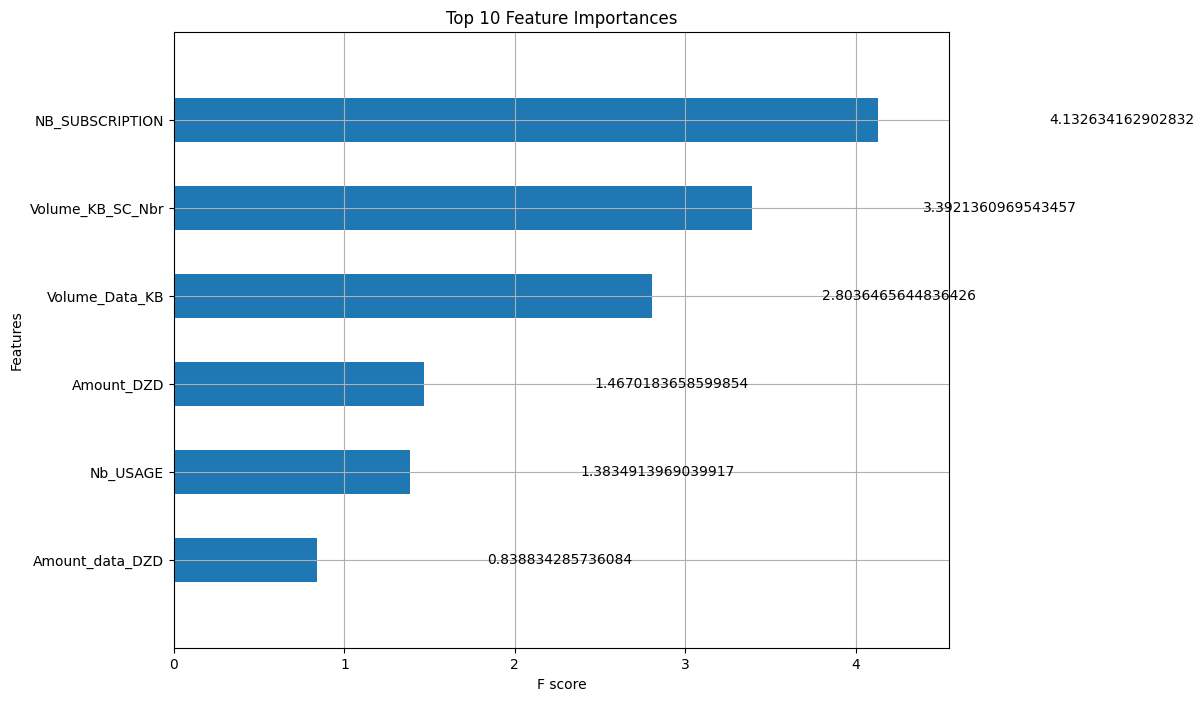

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb
fig, ax = plt.subplots(figsize=(10, 8))
xgb.plot_importance(model, max_num_features=10, height=0.5, ax=ax, importance_type='gain')
plt.title('Top 10 Feature Importances')
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
train = pd.read_csv('/content/TrainDJEZZY.csv')
test = pd.read_csv('/content/TestDJEZZY.csv')
train['USAGE_DATE'] = pd.to_datetime(train['USAGE_DATE'])
train['SUBSCRIPTION_DATE'] = pd.to_datetime(train['SUBSCRIPTION_DATE'])
test['USAGE_DATE'] = pd.to_datetime(test['USAGE_DATE'])
test['SUBSCRIPTION_DATE'] = pd.to_datetime(test['SUBSCRIPTION_DATE'])
train['USAGE_YEAR_MONTH'] = train['USAGE_DATE'].dt.to_period('M')
test['USAGE_YEAR_MONTH'] = test['USAGE_DATE'].dt.to_period('M')
aggregation_functions_train = {
    'NB_SUBSCRIPTION': 'sum',
    'Volume_Data_KB': 'sum',
    'Volume_KB_SC_Nbr': 'sum',
    'Nb_USAGE': 'sum',
    'Product_ID': lambda x: x.mode()[0] if not x.mode().empty else pd.NA  # Most common Product_ID
}
aggregation_functions_test = {
    'NB_SUBSCRIPTION': 'sum',
    'Volume_Data_KB': 'sum',
    'Volume_KB_SC_Nbr': 'sum',
    'Nb_USAGE': 'sum'
}
train_aggregated = train.groupby(['subscribers', 'USAGE_YEAR_MONTH']).agg(aggregation_functions_train).reset_index()
test_aggregated = test.groupby(['subscribers', 'USAGE_YEAR_MONTH']).agg(aggregation_functions_test).reset_index()
label_encoder = LabelEncoder()
train_aggregated['Product_ID_encoded'] = label_encoder.fit_transform(train_aggregated['Product_ID'])
X_train = train_aggregated.drop(['Product_ID', 'Product_ID_encoded', 'USAGE_YEAR_MONTH', 'subscribers'], axis=1)
y_train = train_aggregated['Product_ID_encoded']
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
model = XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model.fit(X_train_split, y_train_split)
y_pred = model.predict(X_val_split)
accuracy = accuracy_score(y_val_split, y_pred)
print("Validation Accuracy:", accuracy)
X_test = test_aggregated.drop(['USAGE_YEAR_MONTH', 'subscribers'], axis=1)
test_predictions = model.predict(X_test)
test_predictions_original = label_encoder.inverse_transform(test_predictions)
submission = pd.DataFrame({
    'subscribers': test_aggregated['subscribers'],
    'Product_ID': test_predictions_original
})
if submission['subscribers'].duplicated().any():
    print("Duplicates found. Aggregating predictions...")
    submission = submission.groupby('subscribers')['Product_ID'].agg(lambda x: x.mode()[0]).reset_index()
print("Submission file created successfully!")
submission.to_csv('/content/final_submission.csv', index=False)


Validation Accuracy: 0.6367785234899329
Duplicates found. Aggregating predictions...
Submission file created successfully!


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load and prepare data as previously done, code for that part is assumed to be above this snippet
label_encoder = LabelEncoder()
train_aggregated['Product_ID_encoded'] = label_encoder.fit_transform(train_aggregated['Product_ID'])

# Preparing features and target
X = train_aggregated.drop(['Product_ID', 'Product_ID_encoded', 'USAGE_YEAR_MONTH', 'subscribers'], axis=1)
y = train_aggregated['Product_ID_encoded']

# Splitting data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the minimum class size in the training set
min_class_size = y_train.value_counts().min()
print("Smallest class size:", min_class_size)

# Apply SMOTE if applicable
if min_class_size > 1:  # Ensuring there are at least two samples to use SMOTE
    smote = SMOTE(random_state=42, k_neighbors=min_class_size - 1)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    print("SMOTE applied successfully.")
else:
    print("Not enough samples in the smallest class to apply SMOTE. Proceeding with original data.")
    X_train_smote, y_train_smote = X_train, y_train  # Use original data if SMOTE not applicable

# Train the model using XGBClassifier
model = XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model.fit(X_train_smote, y_train_smote)

# Validate the model
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy after SMOTE:", accuracy)


Smallest class size: 1
Not enough samples in the smallest class to apply SMOTE. Proceeding with original data.
Validation Accuracy after SMOTE: 0.6367785234899329


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [09:31:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Validation Accuracy: 0.6367785234899329


In [ ]:
import pandas as pd
train = pd.read_csv('/content/TrainDJEZZY.csv')
test = pd.read_csv('/content/TestDJEZZY.csv')
train['USAGE_DATE'] = pd.to_datetime(train['USAGE_DATE'])
train['SUBSCRIPTION_DATE'] = pd.to_datetime(train['SUBSCRIPTION_DATE'])
test['USAGE_DATE'] = pd.to_datetime(test['USAGE_DATE'])
test['SUBSCRIPTION_DATE'] = pd.to_datetime(test['SUBSCRIPTION_DATE'])
train['USAGE_YEAR_MONTH'] = train['USAGE_DATE'].dt.to_period('M')
test['USAGE_YEAR_MONTH'] = test['USAGE_DATE'].dt.to_period('M')
aggregation_functions_train = {
    'NB_SUBSCRIPTION': 'sum',
    'Amount_DZD': 'sum',
    'Amount_data_DZD': 'sum',
    'Volume_Data_KB': 'sum',
    'Volume_KB_SC_Nbr': 'sum',
    'Nb_USAGE': 'sum',
    'Product_ID': lambda x: x.mode()[0] if not x.mode().empty else pd.NA
}
aggregation_functions_test = {
    'NB_SUBSCRIPTION': 'sum',
    'Amount_DZD': 'sum',
    'Amount_data_DZD': 'sum',
    'Volume_Data_KB': 'sum',
    'Volume_KB_SC_Nbr': 'sum',
    'Nb_USAGE': 'sum'
}
train_aggregated = train.groupby(['subscribers', 'USAGE_YEAR_MONTH']).agg(aggregation_functions_train).reset_index()
test_aggregated = test.groupby(['subscribers', 'USAGE_YEAR_MONTH']).agg(aggregation_functions_test).reset_index()
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_aggregated['Product_ID_encoded'] = label_encoder.fit_transform(train_aggregated['Product_ID'])
X_train = train_aggregated.drop(['Product_ID', 'Product_ID_encoded', 'USAGE_YEAR_MONTH', 'subscribers'], axis=1)
y_train = train_aggregated['Product_ID_encoded']
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
model = XGBClassifier(n_estimators=200, learning_rate=0.1, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model.fit(X_train_split, y_train_split)
y_pred = model.predict(X_val_split)
accuracy = accuracy_score(y_val_split, y_pred)
print("Validation Accuracy:", accuracy)
X_test = test_aggregated.drop(['USAGE_YEAR_MONTH', 'subscribers'], axis=1)
test_predictions = model.predict(X_test)
test_predictions_original = label_encoder.inverse_transform(test_predictions)
submission = pd.DataFrame({
    'subscribers': test_aggregated['subscribers'],
    'Product_ID': test_predictions_original
})
if submission['subscribers'].duplicated().any():
    print("Duplicates found. Aggregating predictions...")
    submission = submission.groupby('subscribers')['Product_ID'].agg(lambda x: x.mode()[0]).reset_index()
print("Submission file created successfully!")
submission.to_csv('/content/final_submission.csv', index=False)

In [ ]:

train = pd.read_csv('/content/TrainDJEZZY.csv')
test = pd.read_csv('/content/TestDJEZZY.csv')
train['USAGE_DATE'] = pd.to_datetime(train['USAGE_DATE'])
train['SUBSCRIPTION_DATE'] = pd.to_datetime(train['SUBSCRIPTION_DATE'])
test['USAGE_DATE'] = pd.to_datetime(test['USAGE_DATE'])
test['SUBSCRIPTION_DATE'] = pd.to_datetime(test['SUBSCRIPTION_DATE'])
train['days_between'] = (train['USAGE_DATE'] - train['SUBSCRIPTION_DATE']).dt.days
test['days_between'] = (test['USAGE_DATE'] - test['SUBSCRIPTION_DATE']).dt.days
train['data_intensity'] = train['Volume_Data_KB'] / train['days_between'].replace(0, np.nan)  # Avoid division by zero
test['data_intensity'] = test['Volume_Data_KB'] / test['days_between'].replace(0, np.nan)  # Avoid division by zero
train['loyalty_score'] = (train['days_between'] / train['NB_SUBSCRIPTION'].replace(0, np.nan))
train['loyalty_score'].replace([np.inf, -np.inf], 0, inplace=True)
test['loyalty_score'] = (test['days_between'] / test['NB_SUBSCRIPTION'].replace(0, np.nan))
test['loyalty_score'].replace([np.inf, -np.inf], 0, inplace=True)
features_to_use = ['NB_SUBSCRIPTION', 'Volume_Data_KB', 'Volume_KB_SC_Nbr', 'Nb_USAGE', 'days_between', 'data_intensity', 'loyalty_score']
label_encoder = LabelEncoder()
train['Product_ID_encoded'] = label_encoder.fit_transform(train['Product_ID'])
y_train = train['Product_ID_encoded']
features_to_use = ['NB_SUBSCRIPTION', 'Volume_Data_KB', 'Volume_KB_SC_Nbr', 'Nb_USAGE', 'days_between', 'data_intensity', 'loyalty_score']
X_train = train[features_to_use]
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
model = XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model.fit(X_train_split, y_train_split)
y_pred = model.predict(X_val_split)
accuracy = accuracy_score(y_val_split, y_pred)
print("Validation Accuracy:", accuracy)
test_features_to_use = ['NB_SUBSCRIPTION', 'Volume_Data_KB', 'Volume_KB_SC_Nbr', 'Nb_USAGE', 'days_between', 'data_intensity', 'loyalty_score']
X_test = test[test_features_to_use]
test_predictions = model.predict(X_test)
test_predictions_original = label_encoder.inverse_transform(test_predictions)
submission = pd.DataFrame({
    'subscribers': test['subscribers'],
    'Product_ID': test_predictions_original
})
if submission['subscribers'].duplicated().any():
    print("Duplicates found. Aggregating predictions...")
    submission = submission.groupby('subscribers')['Product_ID'].agg(lambda x: x.mode()[0]).reset_index()
submission.to_csv('/content/final_submission.csv', index=False)
print("Submission file created successfully!")

Validation Accuracy: 0.37677386421643694
Duplicates found. Aggregating predictions...
Submission file created successfully!


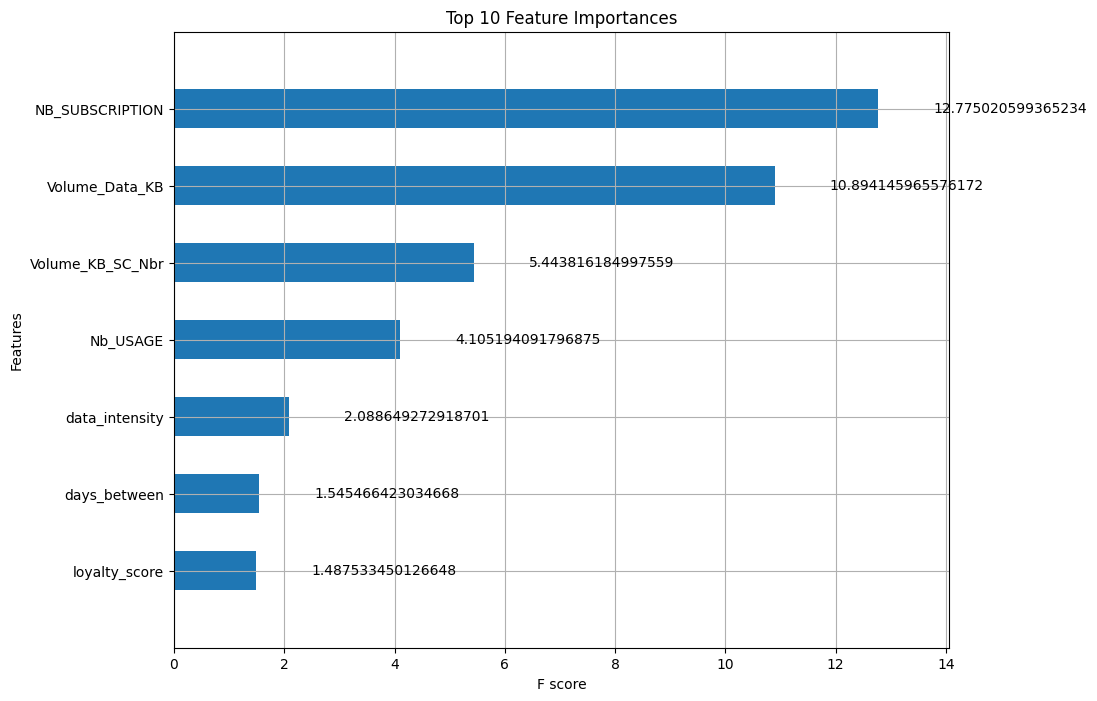

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb
fig, ax = plt.subplots(figsize=(10, 8))
xgb.plot_importance(model, max_num_features=10, height=0.5, ax=ax, importance_type='gain')
plt.title('Top 10 Feature Importances')
plt.show()

In [ ]:
#####
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
train = pd.read_csv('/content/new_trainDjezzy.csv')
train = train.drop_duplicates()
train['USAGE_DATE'] = pd.to_datetime(train['USAGE_DATE'])
train['Month'] = train['USAGE_DATE'].dt.month
train = train.drop(['SUBSCRIPTION_DATE','Ines','USAGE_DATE'], axis =1)




test = pd.read_csv('/content/TestDJEZZY.csv')
test = test.drop_duplicates()
test['SUBSCRIPTION_DATE'] = pd.to_datetime(test['SUBSCRIPTION_DATE'])
test['USAGE_DATE'] = pd.to_datetime(test['USAGE_DATE'])
test['Month'] = test['USAGE_DATE'].dt.month
test = test.drop(['SUBSCRIPTION_DATE','USAGE_DATE'], axis =1)
train

<ipython-input-11-b1ce3e6999b8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['USAGE_DATE'] = pd.to_datetime(train['USAGE_DATE'])


,subscribers,Product_ID,NB_SUBSCRIPTION,usage_Type,Destination,Amount_DZD,Amount_data_DZD,Volume_Data_KB,Volume_KB_SC_Nbr,Nb_USAGE,Month
0,0,101,1,DATA,DATA,0.00,0.0,35028403.65,35028403.65,907,8
1,0,101,1,VOICE,ON-NET,0.00,0.0,0.00,16710.00,79,8
2,0,101,1,VOICE,OFF-NET,0.00,0.0,0.00,2790.00,51,8
3,0,101,1,SMS,OFF-NET,0.00,0.0,0.00,1.00,1,9
4,0,101,1,VOICE,FIX,0.00,0.0,0.00,300.00,3,9
...,...,...,...,...,...,...,...,...,...,...,...
249257,9998,101,1,DATA,DATA,0.00,0.0,10404248.11,10404248.11,1000,12
249258,9998,101,1,SMS,Others,40.00,0.0,0.00,2.00,2,12
249259,9998,101,1,VOICE,OFF-NET,0.00,0.0,0.00,1620.00,16,12
249260,9998,101,1,VOICE,ON-NET,59.88,0.0,0.00,31410.00,178,12


In [ ]:
#####
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
train = pd.read_csv('/content/new_trainDjezzy.csv')
test = pd.read_csv('/content/TestDJEZZY.csv')
test['SUBSCRIPTION_DATE'] = pd.to_datetime(test['SUBSCRIPTION_DATE'])
test['USAGE_DATE'] = pd.to_datetime(test['USAGE_DATE'])
X_train = train.drop(['Product_ID', 'subscribers','Ines'], axis=1)
y_train = train['Product_ID']
X_test = test.drop([ 'subscribers','Amount_data_DZD','Amount_DZD'], axis=1)
categorical_features = ['usage_Type','Destination']
numerical_features = [ 'Volume_Data_KB', 'Volume_KB_SC_Nbr', 'Nb_USAGE']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])
pipeline.fit(X_train, y_train)
predicted_product_ids = pipeline.predict(X_test)
submission = pd.DataFrame({
    'subscribers': test['subscribers'],
    'Product_ID': predicted_product_ids
})
if submission['subscribers'].duplicated().any():
    print("Duplicates found. Aggregating predictions...")
    submission = submission.groupby('subscribers')['Product_ID'].agg(lambda x: x.mode()[0]).reset_index()
submission.to_csv('submission.csv', index=False)
print("Submission file created successfully! No duplicates found.")

Duplicates found. Aggregating predictions...
Submission file created successfully! No duplicates found.


In [ ]:
X_test

In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

train = pd.read_csv('/content/new_trainDjezzy.csv')
train.drop(['Ines'], axis=1 )
train['subscribers'] = train['subscribers'].astype(str)
train['NB_SUBSCRIPTION'] = train['NB_SUBSCRIPTION'].astype(int)
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')
X = train.drop('Product_ID', axis=1)
y = train['Product_ID']
X_processed = preprocessor.fit_transform(X)
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_feature_names = numerical_cols + list(cat_feature_names)  # Combining numerical and categorical features
train_processed = pd.DataFrame(X_processed.toarray(), columns=all_feature_names)
train_processed.head()

NameError: name 'numerical_cols' is not defined

In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from pandas.api.types import is_numeric_dtype
def preprocess_data(df):
    df = df.drop_duplicates()
    if 'USAGE_DATE' in df.columns:
        df['USAGE_DATE'] = pd.to_datetime(df['USAGE_DATE'])
        df['Month'] = df['USAGE_DATE'].dt.month
        df.drop(['USAGE_DATE', 'SUBSCRIPTION_DATE'], axis=1, inplace=True)
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    numerical_cols = [col for col in df.columns if is_numeric_dtype(df[col]) and col != 'Month']
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_cols),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
        ],
        remainder='passthrough'
    )
    df_processed = preprocessor.fit_transform(df)
    return df_processed
train_processed = preprocess_data(train)
test_processed = preprocess_data(test)

In [ ]:
import pandas as pd
from scipy.stats import mode
train = pd.read_csv('/content/new_trainDjezzy.csv')
train['USAGE_DATE'] = pd.to_datetime(train['USAGE_DATE'])
train['Month'] = train['USAGE_DATE'].dt.month
train['Year'] = train['USAGE_DATE'].dt.year
train = train.drop(['SUBSCRIPTION_DATE', 'Ines', 'USAGE_DATE'], axis=1)
train['subscribers'] = train['subscribers'].astype(str)  # Ensure subscribers are treated as categorical
aggregated_data = train.groupby(['Year', 'Month', 'subscribers']).agg({
    'NB_SUBSCRIPTION': 'sum',  # Sum of subscriptions
    'Amount_DZD': 'sum',       # Sum of amounts
    'Amount_data_DZD': 'sum',  # Sum of data amounts
    'Volume_Data_KB': 'sum',        # Sum of volume in KB
    'Volume_KB_SC_Nbr': 'sum',    # Sum of another volume metric
    'Nb_USAGE': 'sum',         # Sum of usage counts
    'Product_ID': lambda x: mode(x)[0][0]
}).reset_index()

# Handling categorical features such as usage type with a pivot table
# Assuming usage_type is a column categorizing each row into 'data', 'voice', or 'sms'
usage_types = train.pivot_table(index=['Year', 'Month', 'subscribers'], columns='USAGE_TYPE', values='NB_USAGE', aggfunc='sum', fill_value=0).reset_index()

# Merging the aggregated data with the usage type data
final_data = pd.merge(aggregated_data, usage_types, on=['Year', 'Month', 'subscribers'], how='left')

# Renaming columns for clarity
final_data.rename(columns={
    'data': 'usage_type_data',
    'voice': 'usage_type_voice',
    'sms': 'usage_type_sms'
}, inplace=True)

# Display the reshaped data
print(final_data.head())


IndexError: invalid index to scalar variable.

In [ ]:
import pandas as pd
from statistics import mode, StatisticsError
train = pd.read_csv('/content/new_trainDjezzy.csv')
train['USAGE_DATE'] = pd.to_datetime(train['USAGE_DATE'])
train['Month'] = train['USAGE_DATE'].dt.month
train = train.drop(['SUBSCRIPTION_DATE', 'Ines', 'USAGE_DATE'], axis=1)
train['subscribers'] = train['subscribers'].astype(str)
def safe_mode(x):
    try:
        return mode(x)
    except StatisticsError:
        return None
aggregated_data = train.groupby(['Month', 'subscribers']).agg({
    'NB_SUBSCRIPTION': 'sum',
    'Amount_DZD': 'sum',
    'Amount_data_DZD': 'sum',
    'Volume_Data_KB': 'sum',
    'Volume_KB_SC_Nbr': 'sum',
    'Nb_USAGE': 'sum',
    'Product_ID': lambda x: safe_mode(x)
}).reset_index()
if 'Usage_Type' in train.columns:
    usage_types = train.pivot_table(index=['Month', 'subscribers'],
                                    columns='Usage_Type',
                                    values='Nb_USAGE',
                                    aggfunc='sum',
                                    fill_value=0).reset_index()
    usage_types.columns = ['Month', 'subscribers'] + [f'usage_type_{usage.lower()}' for usage in usage_types.columns[2:]]
    final_data = pd.merge(aggregated_data, usage_types, on=['Month', 'subscribers'], how='left')
else:
    final_data = aggregated_data
test = pd.read_csv('/content/TestDJEZZY.csv')
test['USAGE_DATE'] = pd.to_datetime(test['USAGE_DATE'])
test['Month'] = test['USAGE_DATE'].dt.month
test = test.drop(['SUBSCRIPTION_DATE', 'USAGE_DATE'], axis=1)
test['subscribers'] = test['subscribers'].astype(str)
test_aggregated = test.groupby(['Month', 'subscribers']).agg({
    'NB_SUBSCRIPTION': 'sum',
    'Amount_DZD': 'sum',
    'Amount_data_DZD': 'sum',
    'Volume_Data_KB': 'sum',
    'Volume_KB_SC_Nbr': 'sum',
    'Nb_USAGE': 'sum'
}).reset_index()
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
X_train = final_data.drop(['Product_ID'], axis=1)
y_train = final_data['Product_ID']
X_test = test_aggregated[X_train.columns]
X_train = final_data.drop(['Product_ID', 'subscribers','Amount_data_DZD'], axis=1)  # Exclude non-numeric 'subscribers' for training
X_test = test_aggregated.drop(['subscribers','Amount_data_DZD'], axis=1)
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)
predicted_product_ids = model.predict(X_test)
submission = pd.DataFrame({
    'subscribers': test_aggregated['subscribers'],
    'Product_ID': predicted_product_ids
})
if submission['subscribers'].duplicated().any():
    print("Duplicates found. Aggregating predictions...")
    submission = submission.groupby('subscribers')['Product_ID'].agg(lambda x: x.mode()[0]).reset_index()
submission.to_csv('/content/submission.csv', index=False)
print("Submission file created successfully!")

Duplicates found. Aggregating predictions...
Submission file created successfully!


In [ ]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

from statistics import mode, StatisticsError
train = pd.read_csv('/content/new_trainDjezzy.csv')
train['USAGE_DATE'] = pd.to_datetime(train['USAGE_DATE'])
train['Month'] = train['USAGE_DATE'].dt.month
train = train.drop(['SUBSCRIPTION_DATE', 'Ines', 'USAGE_DATE'], axis=1)
train['subscribers'] = train['subscribers'].astype(str)
def safe_mode(x):
    try:
        return mode(x)
    except StatisticsError:
        return None
aggregated_data = train.groupby(['Month', 'subscribers']).agg({
    'NB_SUBSCRIPTION': 'sum',
    'Amount_DZD': 'sum',
    'Amount_data_DZD': 'sum',
    'Volume_Data_KB': 'sum',
    'Volume_KB_SC_Nbr': 'sum',
    'Nb_USAGE': 'sum',
    'Product_ID': lambda x: safe_mode(x)
}).reset_index()
if 'Usage_Type' in train.columns:
    usage_types = train.pivot_table(index=['Month', 'subscribers'],
                                    columns='Usage_Type',
                                    values='Nb_USAGE',
                                    aggfunc='sum',
                                    fill_value=0).reset_index()
    usage_types.columns = ['Month', 'subscribers'] + [f'usage_type_{usage.lower()}' for usage in usage_types.columns[2:]]
    final_data = pd.merge(aggregated_data, usage_types, on=['Month', 'subscribers'], how='left')
else:
    final_data = aggregated_data
test = pd.read_csv('/content/TestDJEZZY.csv')
test['USAGE_DATE'] = pd.to_datetime(test['USAGE_DATE'])
test['Month'] = test['USAGE_DATE'].dt.month
test = test.drop(['SUBSCRIPTION_DATE', 'USAGE_DATE'], axis=1)
test['subscribers'] = test['subscribers'].astype(str)
test_aggregated = test.groupby(['Month', 'subscribers']).agg({
    'NB_SUBSCRIPTION': 'sum',
    'Amount_DZD': 'sum',
    'Amount_data_DZD': 'sum',
    'Volume_Data_KB': 'sum',
    'Volume_KB_SC_Nbr': 'sum',
    'Nb_USAGE': 'sum'
}).reset_index()
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
X_train = final_data.drop(['Product_ID', 'subscribers', 'Amount_data_DZD'], axis=1)
y_train = final_data['Product_ID']
X_test = test_aggregated.drop(['subscribers', 'Amount_data_DZD'], axis=1)
scaler = StandardScaler()
columns_to_scale = ['Volume_Data_KB', 'Volume_KB_SC_Nbr', 'Nb_USAGE']
X_train_scaled = scaler.fit_transform(X_train[columns_to_scale])
X_test_scaled = scaler.transform(X_test[columns_to_scale])
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Transform Product_ID to start from 0
model = XGBClassifier(n_estimators=200, random_state=42, use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train_scaled, y_train_encoded)
predicted_product_ids_encoded = model.predict(X_test_scaled)
predicted_product_ids = label_encoder.inverse_transform(predicted_product_ids_encoded)
submission = pd.DataFrame({
    'subscribers': test_aggregated['subscribers'],  # Ensure alignment with predictions
    'Product_ID': predicted_product_ids
})
if submission['subscribers'].duplicated().any():
    print("Duplicates found. Aggregating predictions...")
    submission = submission.groupby('subscribers')['Product_ID'].agg(lambda x: x.mode()[0]).reset_index()
submission.to_csv('/content/submission.csv', index=False)
print("Submission file created successfully!")

Duplicates found. Aggregating predictions...
Submission file created successfully!


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from statistics import mode, StatisticsError

# Load and preprocess the training data
train = pd.read_csv('/content/new_trainDjezzy.csv')
train['USAGE_DATE'] = pd.to_datetime(train['USAGE_DATE'])
train['Month'] = train['USAGE_DATE'].dt.month
train.drop(['SUBSCRIPTION_DATE', 'Ines', 'USAGE_DATE'], axis=1, inplace=True)
train['subscribers'] = train['subscribers'].astype(str)

# Aggregate the data
def safe_mode(x):
    try:
        return mode(x)
    except StatisticsError:
        return None  # You might want to return a more common or default value here if mode cannot be computed

aggregated_data = train.groupby(['Month', 'subscribers']).agg({
    'NB_SUBSCRIPTION': 'sum',
    'Amount_DZD': 'sum',
    'Amount_data_DZD': 'sum',
    'Volume_Data_KB': 'sum',
    'Volume_KB_SC_Nbr': 'sum',
    'Nb_USAGE': 'sum',
    'Product_ID': safe_mode
}).reset_index()

# Incorporate usage types if available
if 'Usage_Type' in train.columns:
    usage_types = train.pivot_table(index=['Month', 'subscribers'],
                                    columns='Usage_Type',
                                    values='Nb_USAGE',
                                    aggfunc='sum',
                                    fill_value=0).reset_index()
    usage_types.columns = ['Month', 'subscribers'] + [f'usage_type_{usage.lower()}' for usage in usage_types.columns[2:]]
    aggregated_data = pd.merge(aggregated_data, usage_types, on=['Month', 'subscribers'], how='left')

# Load and preprocess the test data
test = pd.read_csv('/content/TestDJEZZY.csv')
test['USAGE_DATE'] = pd.to_datetime(test['USAGE_DATE'])
test['Month'] = test['USAGE_DATE'].dt.month
test.drop(['SUBSCRIPTION_DATE', 'USAGE_DATE'], axis=1, inplace=True)
test['subscribers'] = test['subscribers'].astype(str)

test_aggregated = test.groupby(['Month', 'subscribers']).agg({
    'NB_SUBSCRIPTION': 'sum',
    'Amount_DZD': 'sum',
    'Amount_data_DZD': 'sum',
    'Volume_Data_KB': 'sum',
    'Volume_KB_SC_Nbr': 'sum',
    'Nb_USAGE': 'sum'
}).reset_index()

# Prepare data for model training
X_train = aggregated_data.drop(['Product_ID', 'subscribers', 'Amount_data_DZD'], axis=1)
y_train = aggregated_data['Product_ID']
X_test = test_aggregated.drop(['subscribers', 'Amount_data_DZD'], axis=1)

# Scale specific columns
scaler = StandardScaler()
columns_to_scale = ['Volume_Data_KB', 'Volume_KB_SC_Nbr', 'Nb_USAGE']
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
model = XGBClassifier(n_estimators=200, random_state=42, use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train_encoded)
predicted_product_ids_encoded = model.predict(X_test)
predicted_product_ids = label_encoder.inverse_transform(predicted_product_ids_encoded)
submission = pd.DataFrame({
    'subscribers': test_aggregated['subscribers'],  # Ensure alignment with predictions
    'Product_ID': predicted_product_ids
})
if submission['subscribers'].duplicated().any():
    print("Duplicates found. Aggregating predictions...")
    submission = submission.groupby('subscribers')['Product_ID'].agg(lambda x: x.mode()[0]).reset_index()
submission.to_csv('/content/submission.csv', index=False)
print("Submission file created successfully!")

Duplicates found. Aggregating predictions...
Submission file created successfully!


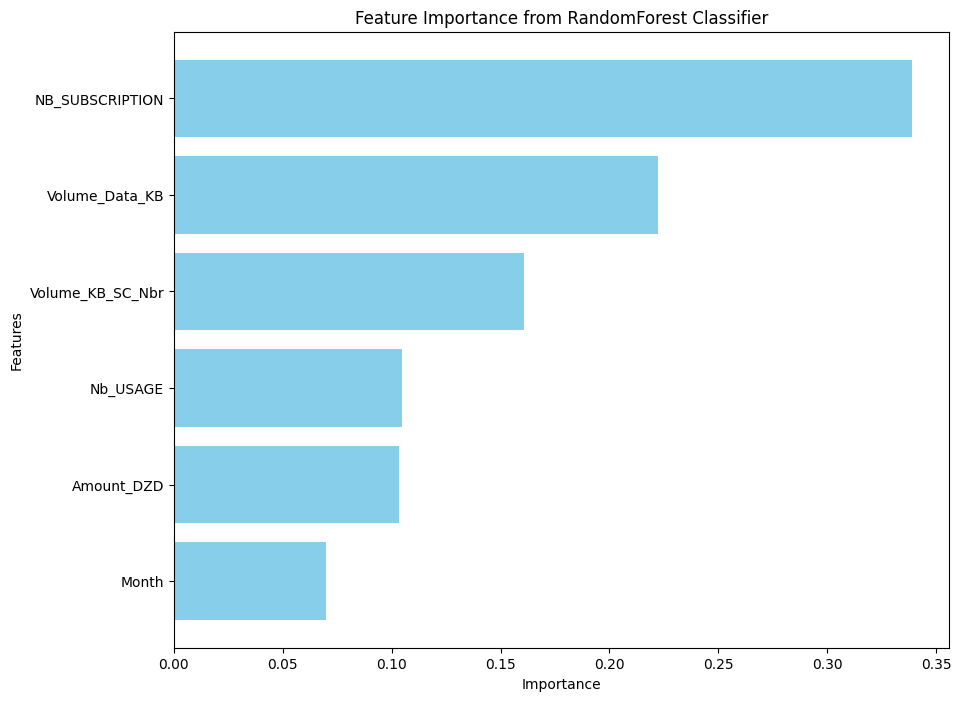

In [ ]:
import matplotlib.pyplot as plt
feature_importances = model.feature_importances_
feature_names = X_train.columns
importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})
importances = importances.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 8))
plt.barh(importances['Feature'], importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance from RandomForest Classifier')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
import pandas as pd
from statistics import mode, StatisticsError
train = pd.read_csv('/content/new_trainDjezzy.csv')
train['USAGE_DATE'] = pd.to_datetime(train['USAGE_DATE'])
train['Month'] = train['USAGE_DATE'].dt.month
train = train.drop(['SUBSCRIPTION_DATE', 'Ines', 'USAGE_DATE'], axis=1)
train['subscribers'] = train['subscribers'].astype(str)
def safe_mode(x):
    try:
        return mode(x)
    except StatisticsError:
        return None
aggregated_data = train.groupby(['Month', 'subscribers']).agg({
    'NB_SUBSCRIPTION': 'sum',
    'Amount_DZD': 'sum',
    'Amount_data_DZD': 'sum',
    'Volume_Data_KB': 'sum',
    'Volume_KB_SC_Nbr': 'sum',
    'Nb_USAGE': 'sum',
    'Product_ID': lambda x: safe_mode(x)
}).reset_index()
if 'Usage_Type' in train.columns:
    usage_types = train.pivot_table(index=['Month', 'subscribers'],
                                    columns='Usage_Type',
                                    values='Nb_USAGE',
                                    aggfunc='sum',
                                    fill_value=0).reset_index()
    usage_types.columns = ['Month', 'subscribers'] + [f'usage_type_{usage.lower()}' for usage in usage_types.columns[2:]]
    final_data = pd.merge(aggregated_data, usage_types, on=['Month', 'subscribers'], how='left')
else:
    final_data = aggregated_data
test = pd.read_csv('/content/TestDJEZZY.csv')
test['USAGE_DATE'] = pd.to_datetime(test['USAGE_DATE'])
test['Month'] = test['USAGE_DATE'].dt.month
test = test.drop(['SUBSCRIPTION_DATE', 'USAGE_DATE'], axis=1)
test['subscribers'] = test['subscribers'].astype(str)
test_aggregated = test.groupby(['Month', 'subscribers']).agg({
    'NB_SUBSCRIPTION': 'sum',
    'Amount_DZD': 'sum',
    'Amount_data_DZD': 'sum',
    'Volume_Data_KB': 'sum',
    'Volume_KB_SC_Nbr': 'sum',
    'Nb_USAGE': 'sum'
}).reset_index()
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
X_train = final_data.drop(['Product_ID'], axis=1)
y_train = final_data['Product_ID']
X_test = test_aggregated[X_train.columns]
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
X_train = final_data.drop(['Product_ID', 'subscribers'], axis=1)  # Exclude non-numeric 'subscribers' for training
y_train = final_data['Product_ID']
model = RandomForestClassifier(n_estimators=200, random_state=42)
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
print("Cross-Validation Scores:", scores)
print("Average Score:", np.mean(scores))
model.fit(X_train, y_train)
X_test = test_aggregated.drop(['subscribers'], axis=1)
predicted_product_ids = model.predict(X_test)
submission = pd.DataFrame({
    'subscribers': test_aggregated['subscribers'],
    'Product_ID': predicted_product_ids
})
if submission['subscribers'].duplicated().any():
    print("Duplicates found. Aggregating predictions...")
    submission = submission.groupby('subscribers')['Product_ID'].agg(lambda x: x.mode()[0]).reset_index()
submission.to_csv('/content/submission.csv', index=False)
print("Submission file created successfully!")

Cross-Validation Scores: [0.6045724  0.62447079 0.61854361 0.62897078 0.61965269 0.62854723
 0.60864041 0.62642948 0.6103346  0.61245235]
Average Score: 0.6182614321562534
Duplicates found. Aggregating predictions...
Submission file created successfully!


Validation Accuracy: 0.5540969722633919
Duplicates found. Aggregating predictions...
Submission file created successfully!


In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from statistics import mode, StatisticsError
train = pd.read_csv('/content/new_trainDjezzy.csv')
train['USAGE_DATE'] = pd.to_datetime(train['USAGE_DATE'])
train['Month'] = train['USAGE_DATE'].dt.month
train = train.drop(['SUBSCRIPTION_DATE', 'Ines', 'USAGE_DATE'], axis=1)
train['subscribers'] = train['subscribers'].astype(str)
def safe_mode(x):
    try:
        return mode(x)
    except StatisticsError:
        return None
aggregated_data = train.groupby(['Month', 'subscribers']).agg({
    'NB_SUBSCRIPTION': 'sum',
    'Amount_DZD': 'sum',
    'Amount_data_DZD': 'sum',
    'Volume_Data_KB': 'sum',
    'Volume_KB_SC_Nbr': 'sum',
    'Nb_USAGE': 'sum',
    'Product_ID': lambda x: safe_mode(x)
}).reset_index()
final_data = aggregated_data
test = pd.read_csv('/content/TestDJEZZY.csv')
test['USAGE_DATE'] = pd.to_datetime(test['USAGE_DATE'])
test['Month'] = test['USAGE_DATE'].dt.month
test = test.drop(['SUBSCRIPTION_DATE', 'USAGE_DATE'], axis=1)
test['subscribers'] = test['subscribers'].astype(str)
test_aggregated = test.groupby(['Month', 'subscribers']).agg({
    'NB_SUBSCRIPTION': 'sum',
    'Amount_DZD': 'sum',
    'Amount_data_DZD': 'sum',
    'Volume_Data_KB': 'sum',
    'Volume_KB_SC_Nbr': 'sum',
    'Nb_USAGE': 'sum'
}).reset_index()
columns_to_scale = ['Nb_USAGE']
scaler = StandardScaler()
X_train = final_data.drop(['Product_ID', 'subscribers','Amount_data_DZD','Month','Amount_DZD','NB_SUBSCRIPTION'], axis=1)
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test = test_aggregated.drop(['subscribers','subscribers','Amount_data_DZD','Month','Amount_DZD','NB_SUBSCRIPTION'], axis=1)
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])
y_train = final_data['Product_ID']
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)
predicted_product_ids = model.predict(X_test)
submission = pd.DataFrame({
    'subscribers': test_aggregated['subscribers'],
    'Product_ID': predicted_product_ids
})
if submission['subscribers'].duplicated().any():
    print("Duplicates found. Aggregating predictions...")
    submission = submission.groupby('subscribers')['Product_ID'].agg(lambda x: x.mode()[0]).reset_index()
submission.to_csv('/content/submission.csv', index=False)
print("Submission file created successfully!")

Duplicates found. Aggregating predictions...
Submission file created successfully!


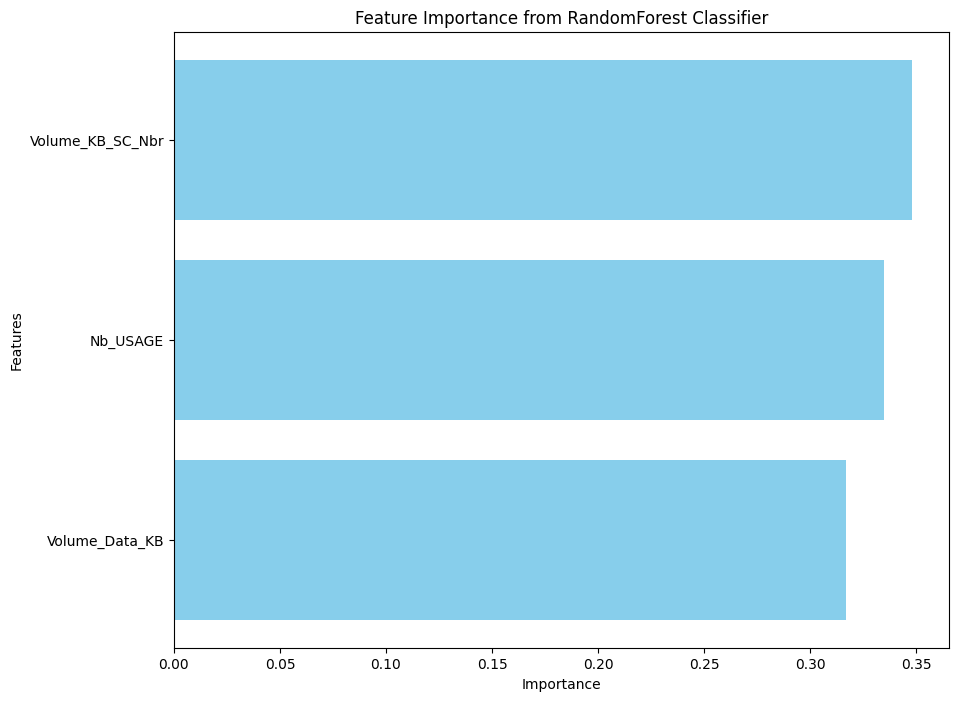

In [12]:
import matplotlib.pyplot as plt
feature_importances = model.feature_importances_
feature_names = X_train.columns
importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})
importances = importances.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 8))
plt.barh(importances['Feature'], importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance from RandomForest Classifier')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from statistics import mode, StatisticsError

# Load and preprocess data
train = pd.read_csv('/content/new_trainDjezzy.csv')
train['USAGE_DATE'] = pd.to_datetime(train['USAGE_DATE'])
train['Month'] = train['USAGE_DATE'].dt.month
train = train.drop(['SUBSCRIPTION_DATE', 'Ines', 'USAGE_DATE'], axis=1)
train['subscribers'] = train['subscribers'].astype(str)

# Function to handle statistics errors in mode calculation
def safe_mode(x):
    try:
        return mode(x)
    except StatisticsError:
        return None  # Adjust as needed, perhaps returning a default or the most common value

# Aggregate data
aggregated_data = train.groupby(['Month', 'subscribers']).agg({
    'NB_SUBSCRIPTION': 'sum',
    'Amount_DZD': 'sum',
    'Amount_data_DZD': 'sum',
    'Volume_Data_KB': 'sum',
    'Volume_KB_SC_Nbr': 'sum',
    'Nb_USAGE': 'sum',
    'Product_ID': safe_mode
}).reset_index()

# Prepare the feature matrix and target vector
X = aggregated_data.drop(['Product_ID', 'subscribers'], axis=1)
y = aggregated_data['Product_ID']
columns_to_scale = ['Volume_KB_SC_Nbr', 'Nb_USAGE', 'Amount_DZD']
scaler = StandardScaler()
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Number of folds can be adjusted
model = RandomForestClassifier(n_estimators=200, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')  # Change scoring to other metrics if needed
print(f'Cross-validation scores: {cv_scores}')
print(f'Average score: {cv_scores.mean()}')
model.fit(X, y)
X_test = test_aggregated.drop(['subscribers'], axis=1)
predicted_product_ids = model.predict(X_test)
submission = pd.DataFrame({
    'subscribers': test_aggregated['subscribers'],
    'Product_ID': predicted_product_ids
})
if submission['subscribers'].duplicated().any():
    print("Duplicates found. Aggregating predictions...")
    submission = submission.groupby('subscribers')['Product_ID'].agg(lambda x: x.mode()[0]).reset_index()
submission.to_csv('/content/submission.csv', index=False)
print("Submission file created successfully!")

Cross-validation scores: [0.61761592 0.62904933 0.62481474 0.61944091 0.61520542]
Average score: 0.621225265565797
Duplicates found. Aggregating predictions...
Submission file created successfully!


In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from statistics import mode, StatisticsError

# Load and preprocess the data
train = pd.read_csv('/content/new_trainDjezzy.csv')
train['USAGE_DATE'] = pd.to_datetime(train['USAGE_DATE'])
train['Month'] = train['USAGE_DATE'].dt.month
train.drop(['SUBSCRIPTION_DATE', 'Ines', 'USAGE_DATE'], axis=1, inplace=True)
train['subscribers'] = train['subscribers'].astype(str)

# Define a safe mode function
def safe_mode(x):
    try:
        return mode(x)
    except StatisticsError:
        return None  # Adjust this as necessary

# Aggregate the data
aggregated_data = train.groupby(['Month', 'subscribers']).agg({
    'NB_SUBSCRIPTION': 'sum',
    'Amount_DZD': 'sum',
    'Amount_data_DZD': 'sum',
    'Volume_Data_KB': 'sum',
    'Volume_KB_SC_Nbr': 'sum',
    'Nb_USAGE': 'sum',
    'Product_ID': safe_mode
}).reset_index()

# Load test data
test = pd.read_csv('/content/TestDJEZZY.csv')
test['USAGE_DATE'] = pd.to_datetime(test['USAGE_DATE'])
test['Month'] = test['USAGE_DATE'].dt.month
test.drop(['SUBSCRIPTION_DATE', 'USAGE_DATE'], axis=1, inplace=True)
test['subscribers'] = test['subscribers'].astype(str)

# Aggregate test data
test_aggregated = test.groupby(['Month', 'subscribers']).agg({
    'NB_SUBSCRIPTION': 'sum',
    'Amount_DZD': 'sum',
    'Amount_data_DZD': 'sum',
    'Volume_Data_KB': 'sum',
    'Volume_KB_SC_Nbr': 'sum',
    'Nb_USAGE': 'sum'
}).reset_index()

# Prepare data for the model
columns_to_scale = ['Volume_KB_SC_Nbr', 'Amount_DZD', 'Nb_USAGE', 'NB_SUBSCRIPTION']
scaler = StandardScaler()
X_train = aggregated_data.drop(['Product_ID', 'subscribers','Amount_data_DZD'], axis=1)
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test = test_aggregated.drop(['subscribers','Amount_data_DZD'], axis=1)
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])
y_train = aggregated_data['Product_ID']

# Initialize and train the LightGBM model
model = LGBMClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test data
predicted_product_ids = model.predict(X_test)

# Prepare the submission
submission = pd.DataFrame({
    'subscribers': test_aggregated['subscribers'],
    'Product_ID': predicted_product_ids
})

# Handle duplicates if any
if submission['subscribers'].duplicated().any():
    print("Duplicates found. Aggregating predictions...")
    submission = submission.groupby('subscribers')['Product_ID'].agg(lambda x: x.mode()[0]).reset_index()

# Save the submission file
submission.to_csv('/content/submission.csv', index=False)
print("Submission file created successfully!")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003705 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1138
[LightGBM] [Info] Number of data points in the train set: 23613, number of used features: 6
[LightGBM] [Info] Start training from score -5.792887
[LightGBM] [Info] Start training from score -5.142299
[LightGBM] [Info] Start training from score -8.970940
[LightGBM] [Info] Start training from score -5.515676
[LightGBM] [Info] Start training from score -4.261410
[LightGBM] [Info] Start training from score -3.787286
[LightGBM] [Info] Start training from score -4.129381
[LightGBM] [Info] Start training from score -2.049611
[LightGBM] [Info] Start training from score -3.216254
[LightGBM] [Info] Start training from score -0.794361
[LightGBM] [Info] Start training from score -2.226489
[LightGBM] [Info] Start training from score -1.825219
[LightGBM] [Info] Start training from score -3.117781
[LightGBM]